In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
pathresults = "../../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","

import matplotlib.ticker as mtick
import seaborn as sns
viridis = matplotlib.colormaps.get_cmap('viridis')
from matplotlib import colors

so selection:
several have cc < co. we say it s not ok for all the volumes, as resolution soil is 1 cm, so we go up to 1cm away from root, so not that far away
also, for a couple, we are above the 0.6 limit.
For the rest, select according to PCA. Maybe 4 as before
after sree graph, mainly component 1 and 2 are important
so take extremes (3) and one in the middle
we get [44,]

In [2]:
df = pd.read_pickle("./cyl10to11_4d.pkl") 

#outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
#column_names = outputvalsname + paramsets.columns.tolist()
def getnewval(df):
    #outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
    #column_names = outputvalsname + paramsets.columns.tolist()
    df['css']=df['css2']
    df['cxd']=df['cod']+df['ccd']
    df['cxa']=df['coa']+df['cca']
    df['cx']=df['co']+df['cc']
    df['cxd_cx']=df['cxd']/df['cx']
    df['cxa_cx']=df['cxa']/df['cx']
    df['theta']=df['wat']/df['vol']
    #df  = pd.merge(df, paramsets[['pSet', 'theta_th']], on="pSet")
    #df['csBis'] = df['cs']*df['theta']/df['theta_th']
    #df['clBis'] = df['cl']*df['theta']/df['theta_th']
    # per unit of soil volume
    df['cs_'] = df['cs']*df['theta']
    df['cl_'] = df['cl']*df['theta']
    #df.loc[df['scenario'] == "earlyDry",'scenario']="earlyDry"  # Select subset where 'pSet' equals the current value
    
    solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
    solidMolarMass = 60.08e-3 # [kg/mol] 
    thetaS= 0.43
    mgC_per_molC=12.011*1000
    
    massBulkDensity = solidDensity*(1.- thetaS) *1000 /1e6 # [kg/m^3 scv] * [g/kg] * [m3/cm3] = g/cm3
    #df['pSet']=df['scenario']+'_'+df['pSet']

    # mol/cm3 scv to mg C pool/g C mineral
    if True:
        for nnn in ['cs_','cl_','co','cc','coa','cod','cca','ccd','css2']:
            # mol C/cm3 *  
            df[nnn+'_mass'] = df[nnn]*mgC_per_molC / massBulkDensity
    return df
df = getnewval(df)
dfa = df
pSet2Keep =[17,38,44,85]#[17,38,44,85]

In [24]:
df

wat            cs        cl           coa           cod  \
0      0.043164  3.580200e-07  0.000910  1.559599e-09  9.273342e-06   
1      0.007359  3.545819e-07  0.000863  1.547891e-09  9.273352e-06   
2      0.008891  4.191260e-07  0.000798  1.798020e-09  9.273140e-06   
3      0.008445  3.552012e-07  0.000800  1.549898e-09  9.273350e-06   
4      0.007028  3.021884e-05  0.000931  1.103364e-05  8.488178e-09   
...         ...           ...       ...           ...           ...   
45856  0.107388  7.993337e-07  0.000675  2.991717e-07  8.972346e-06   
45857  0.014028  3.608405e-06  0.000675  7.763518e-07  8.505577e-06   
45858  0.014119  2.021994e-06  0.000675  6.971693e-07  8.584745e-06   
45859  0.215349  2.123169e-07  0.000675  1.458284e-07  9.120594e-06   
45860  0.108027  5.610611e-07  0.000675  2.463487e-07  9.023227e-06   

                cca           ccd      css2           co2        yX  ...  \
0      3.710699e-08  9.274678e-06  0.000008  4.204311e-06 -0.298434  ...   
1      3.708371e-08  9.274679e-06  0.000008  4.203686e-06  0.043922  ...   
2      3.753666e-08  9.274561e-06  0.000010  4.213155e-06 -0.447197  ...   
3      3.708737e-08  9.274678e-06  0.000008  4.203759e-06 -0.104340  ...   
4      1.211594e-05  4.814225e-07  0.000593  9.941887e-05 -0.125120  ...   
...             ...           ...       ...           ...       ...  ...   
45856  3.850334e-07  9.129081e-06  0.000014  1.624442e-05  0.882095  ...   
45857  1.123396e-06  8.898858e-06  0.000051  3.979705e-05 -0.281210  ...   
45858  1.109735e-06  8.919545e-06  0.000048  4.012103e-05  0.457628  ...   
45859  1.665676e-08  9.160251e-06  0.000005  6.511811e-07  0.721308  ...   
45860  2.512488e-07  9.088689e-06  0.000013  8.196767e-06 -1.080924  ...   

        co_mass   cc_mass  coa_mass  cod_mass  cca_mass  ccd_mass  css2_mass  \
0      0.073751  0.074044  0.000012  0.073739  0.000295  0.073749   0.066536   
1      0.073751  0.074044  0.000012  0.073739  0.000295  0.073749   0.065927   
2      0.073751  0.074047  0.000014  0.073737  0.000298  0.073748   0.077720   
3      0.073751  0.074044  0.000012  0.073739  0.000295  0.073749   0.066034   
4      0.087803  0.100170  0.087736  0.000067  0.096342  0.003828   4.716297   
...         ...       ...       ...       ...       ...       ...        ...   
45856  0.073724  0.075653  0.002379  0.071345  0.003062  0.072591   0.114493   
45857  0.073807  0.079694  0.006173  0.067634  0.008933  0.070761   0.405831   
45858  0.073807  0.079750  0.005544  0.068263  0.008824  0.070925   0.379205   
45859  0.073684  0.072972  0.001160  0.072524  0.000132  0.072839   0.039265   
45860  0.073709  0.074268  0.001959  0.071750  0.001998  0.072270   0.104181   

         height           CLl   cs_/css  
0     -1.204434  7.726857e-08  0.009234  
1     -2.113870  8.089282e-08  0.009757  
2     -2.971433  1.037823e-07  0.010618  
3     -3.905582  8.794582e-08  0.010590  
4     -4.901093  6.454558e-06  0.010882  
...         ...           ...       ...  
45856 -3.781242  1.705161e-07  0.011843  
45857 -9.707652  7.815951e-07  0.015314  
45858 -9.512540  4.383389e-07  0.009192  
45859 -7.589364  4.572232e-08  0.009259  
45860 -8.210298  1.212191e-07  0.009252  

[45861 rows x 68 columns]

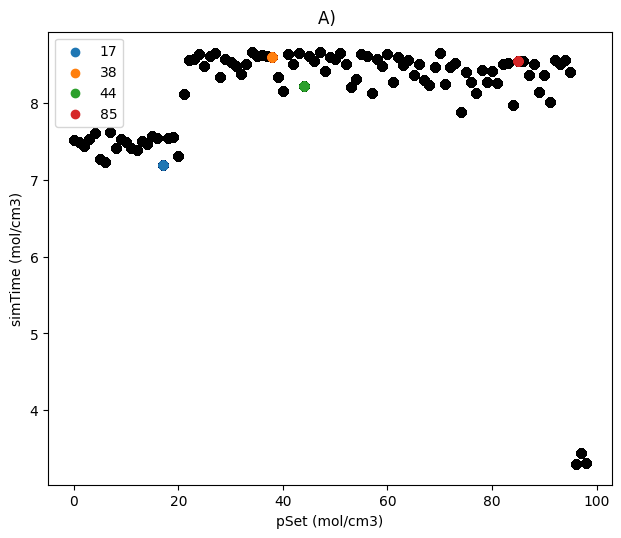

In [30]:
xname = 'pSet'
yname='simTime'
plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)

unique_values = df["pSet"].drop_duplicates()

for value in unique_values:
    subset = df[df["pSet"] == value]  
    
    plt.scatter(subset[xname], subset[yname]/(3600), alpha=0.5, 
                c = 'k'
               )
for value in [17,38,44,85]:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

    plt.scatter(subset[xname], subset[yname]/(3600), alpha=1, 
                label=f'{value}',
                zorder=100#color_map[value]
               )

plt.legend()
plt.xlabel(xname + ' (mol/cm3)')
plt.ylabel(yname+' (mol/cm3)')
plt.show()


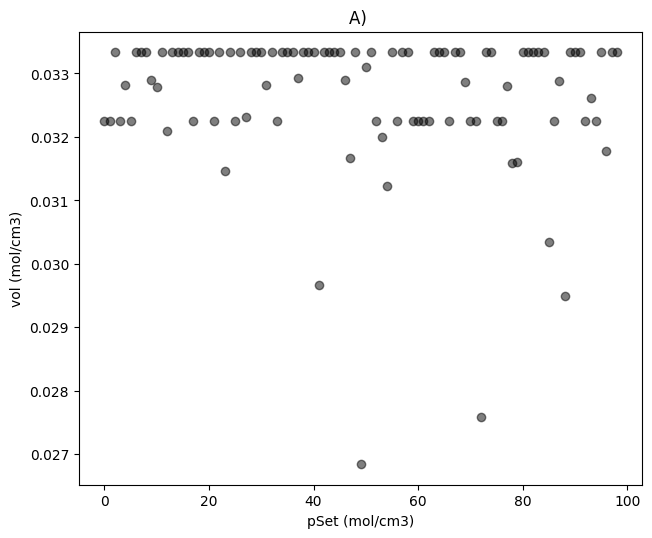

In [44]:
xname = 'pSet'
yname='vol'
plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)

unique_values = df["pSet"].drop_duplicates()

for value in unique_values:
    subset = df[df["pSet"] == value]  
    
    
    plt.scatter(value,min( subset[yname]), alpha=0.5, 
                c = 'k'
               )
if False:
    for value in [17,38,44,85]:
        subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

        plt.scatter(subset[xname], subset[yname]/(3600), alpha=1, 
                    label=f'{value}',
                    zorder=100#color_map[value]
                   )

    plt.legend()
plt.xlabel(xname + ' (mol/cm3)')
plt.ylabel(yname+' (mol/cm3)')
plt.show()


In [39]:
# only pset 76 can keep activated ratio < 0.8
allset= set(df['pSet'])#.unique()#df['scenario'].unique()
psetCaCxa = set( df[(df['cxa_cx']>=0.6)]['pSet'])#.unique()#set(set()  )
psetCaCxb = set( df[(df['cxa_cx']<=0.0006)]['pSet'])  
pSethighC =   set(df[df['cs']>4.58e-5]['pSet']) #
pSethighCsCl =   set(df[(df['cs']+df['cl'])>0.0027]['pSet']) #
pSetlowCsCl =   set(df[(df['cs']+df['cl'])<0.00022]['pSet']) #
pSetLowCoCc =set(df[(df['co'] + df['cc'])<3e-6]['pSet'])#
pSethighCoCc =set(df[(df['co'] + df['cc'])>1e-4]['pSet'])#  )
pSethighCoCcBis =  set(df[(df['co'] > df['cc'])]['pSet'])
print('psetCaCxa',psetCaCxa, 'psetCaCxb',psetCaCxb, 
      'pSethighC',pSethighC, 
      'pSethighCsCl',pSethighCsCl,
      'pSetlowCsCl',pSetlowCsCl,
      'pSetLowCoCc',pSetLowCoCc,
      'pSethighCoCc',pSethighCoCc,
      'pSethighCoCcBis',pSethighCoCcBis#,
      #set(dfa[(dfa['cxa_cx']>=0.6)]['pSet'])
     )
print('survivors',
      len(allset-psetCaCxa-pSethighC-pSethighCsCl-\
              pSetlowCsCl-pSetLowCoCc-pSethighCoCc-pSethighCoCcBis))

psetCaCxa {0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 14, 15, 16, 18, 19, 20, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 48, 50, 51, 52, 54, 59, 61, 63, 64, 65, 66, 67, 68, 71, 77, 78, 79, 80, 81, 82, 87, 90, 91, 93} psetCaCxb set() pSethighC {1, 2, 68, 39, 8, 9, 71, 14, 18, 61, 28, 29, 30, 63} pSethighCsCl set() pSetlowCsCl set() pSetLowCoCc set() pSethighCoCc {40, 74, 12, 13, 44, 57} pSethighCoCcBis {0, 10, 14, 24, 25, 31, 32, 35, 39, 41, 50, 59, 62, 64, 66, 74, 79, 82, 86, 97, 98}
survivors 29


In [41]:
repr(pSethighCoCcBis)

'{0, 10, 14, 24, 25, 31, 32, 35, 39, 41, 50, 59, 62, 64, 66, 74, 79, 82, 86, 97, 98}'

In [35]:
survivors = (allset-psetCaCxa-pSethighC-pSethighCsCl-\
              pSetlowCsCl-pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

In [36]:
[i for i in [17,38,44,85] if i in survivors ]

[17, 85]

In [38]:
print(set(allset),#'\npsetCaCxa\n',set(psetCaCxa), 
      #'\n\npSethighC',set(pSethighC), 
      #'\n\npSetLowCoCc\n',set(pSetLowCoCc),
     # '\n\npSethighCoCc\n',set(pSethighCoCc),
      '\n\npSethighCoCcBis\n',set(pSethighCoCcBis)
     )
print(survivors)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98} 

pSethighCoCcBis
 {0, 64, 66, 10, 74, 14, 79, 82, 86, 24, 25, 31, 32, 97, 98, 35, 39, 41, 50, 59, 62}
{5, 7, 17, 21, 27, 34, 42, 47, 49, 53, 55, 56, 58, 60, 69, 70, 72, 73, 75, 76, 83, 84, 85, 88, 89, 92, 94, 95, 96}


In [ ]:
set(pSethighCoCcBis)

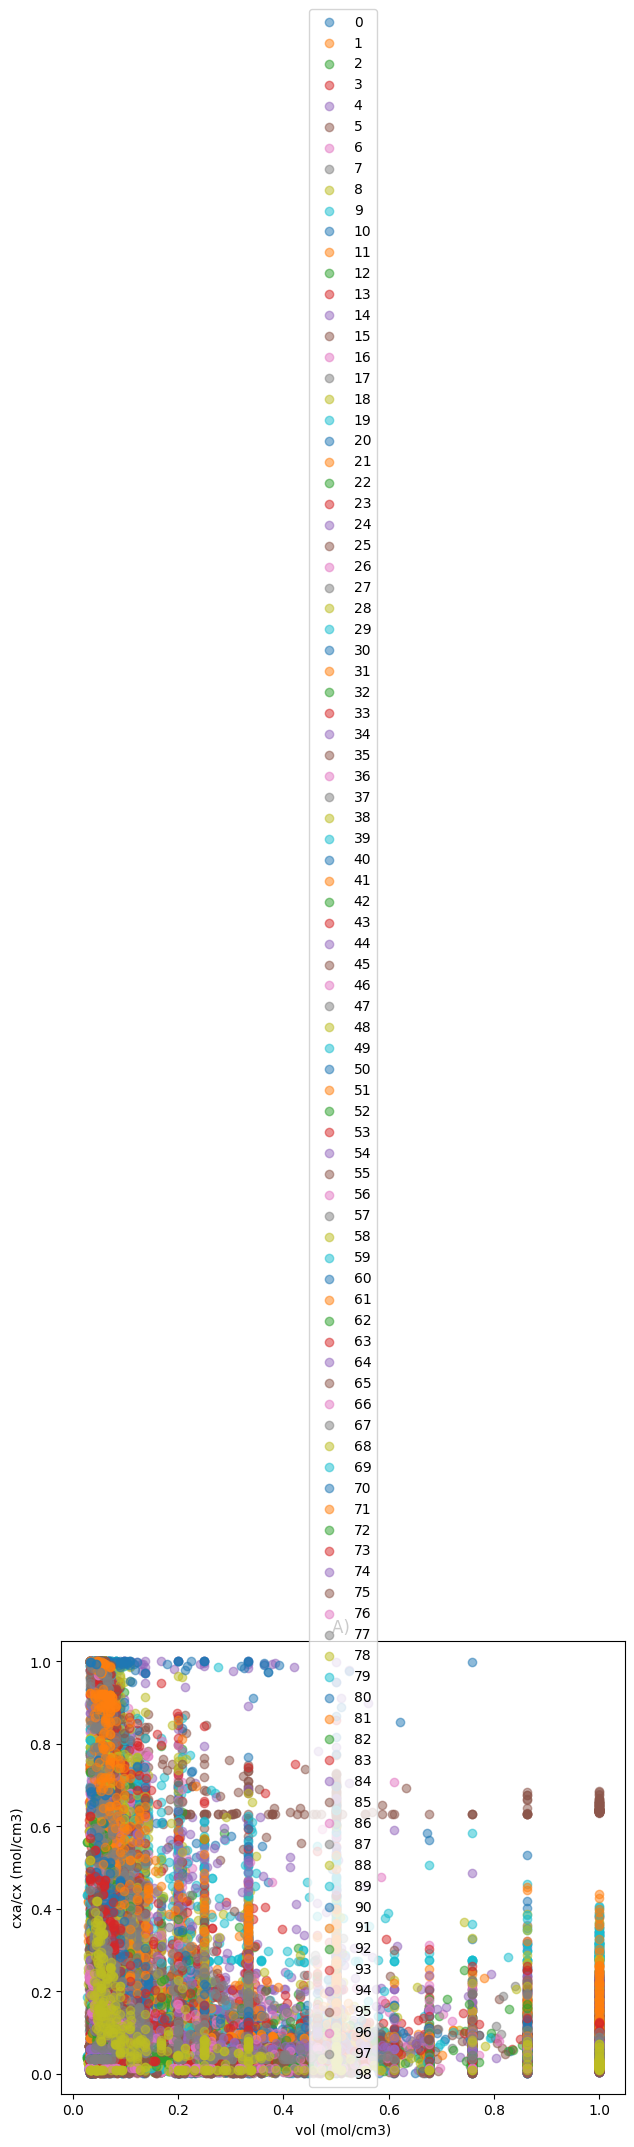

In [21]:
markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
def XvsY(df, xname, yname,unique_values=None):
    doBlack = False
    if unique_values is None:
        doBlack = True
        unique_values = df["pSet"].drop_duplicates()
    rgb_values = sns.color_palette("Set2", 99)
    color_map = dict(zip(df['pSet'].drop_duplicates(),rgb_values))
    #markers_map = dict(zip(df['scenario' ].drop_duplicates(),markers))

    for value in unique_values:
        subset = df[df["pSet"] == value]  # Select subset where 'pSet' equals the current value
        col =color_map[subset['pSet'].unique()[0]]
        edgecolors=  (0.0, 0.0, 0.0)
        if doBlack:
            if value in pSet2Keep:
                col = (0.0, 0.0, 0.0)
                edgecolors=  (1,1,1)
        col = colors.to_hex(col)
        #mm = markers_map[subset['scenario'].unique()[0]]
        plt.scatter(subset[xname],subset['cxa']/subset['cx'],# subset[yname], 
                    alpha=0.5, 
                    #c = col,#marker=mm,
                    label=f'{value}' #color_map[value]
                   )
    if False:#doBlack:
        for value in pSet2Keep:
            subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

            col = (0.0, 0.0, 0.0)
            edgecolors=  (1,1,1)
            col = colors.to_hex(col)
            plt.scatter(subset['vol'], subset['cxa']/subset['cx'], alpha=1, 
                        c = col ,
                        zorder=100#color_map[value]
                       )
    
    plt.legend()
    # Add labels and legend
    plt.xlabel(xname + ' (mol/cm3)')
    plt.ylabel(yname+' (mol/cm3)')
    #plt.xlabel('cc (mg C/g soil mineral)')
    #plt.ylabel('co (mg C/g soil mineral)')

    #plt.show()
    
plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)
XvsY(df,'vol','cxa/cx')

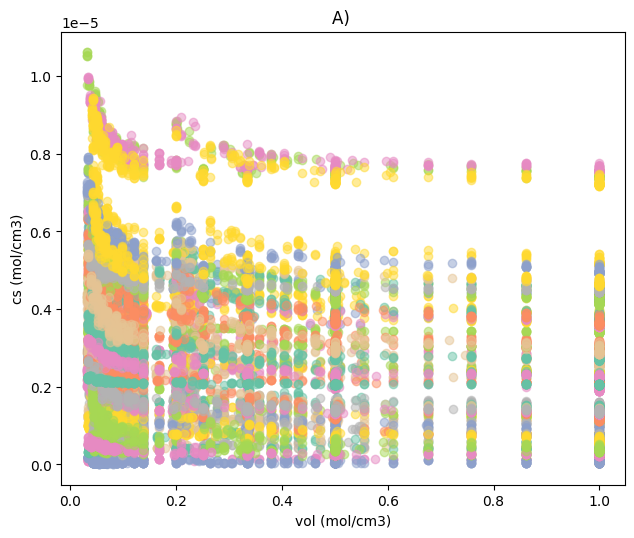

In [400]:
markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
def XvsY(df, xname, yname,unique_values=None):
    doBlack = False
    if unique_values is None:
        doBlack = True
        unique_values = survivors#df["pSet"].drop_duplicates()
    rgb_values = sns.color_palette("Set2", 99)
    color_map = dict(zip(df['pSet'].drop_duplicates(),rgb_values))
    #markers_map = dict(zip(df['scenario' ].drop_duplicates(),markers))

    for value in unique_values:
        subset = df[df["pSet"] == value]  # Select subset where 'pSet' equals the current value
        col =color_map[subset['pSet'].unique()[0]]
        edgecolors=  (0.0, 0.0, 0.0)
        if False:#doBlack:
            if value in pSet2Keep:
                col = (0.0, 0.0, 0.0)
                edgecolors=  (1,1,1)
        col = colors.to_hex(col)
        #mm = markers_map[subset['scenario'].unique()[0]]
        plt.scatter(subset[xname], subset[yname], alpha=0.5, 
                    c = col,#marker=mm,
                    label=f'{value}' #color_map[value]
                   )
    if False:#doBlack:
        for value in pSet2Keep:
            subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

            col = (0.0, 0.0, 0.0)
            edgecolors=  (1,1,1)
            col = colors.to_hex(col)
            plt.scatter(subset['cc'], subset['co'], alpha=1, 
                        c = col ,
                        zorder=100#color_map[value]
                       )
    
    #plt.legend()
    # Add labels and legend
    plt.xlabel(xname + ' (mol/cm3)')
    plt.ylabel(yname+' (mol/cm3)')
    #plt.xlabel('cc (mg C/g soil mineral)')
    #plt.ylabel('co (mg C/g soil mineral)')

    #plt.show()

plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)
XvsY(df,'vol','cs')

Fitted parameters: a = 5.070611571212303e-06, b = 24.231699952683627, c = 3.1112095157104525e-06
covariance [2.87383857e-07 1.33703443e+00 2.85650507e-08] 5821155624618541.0
r_squared 0.882139871799635


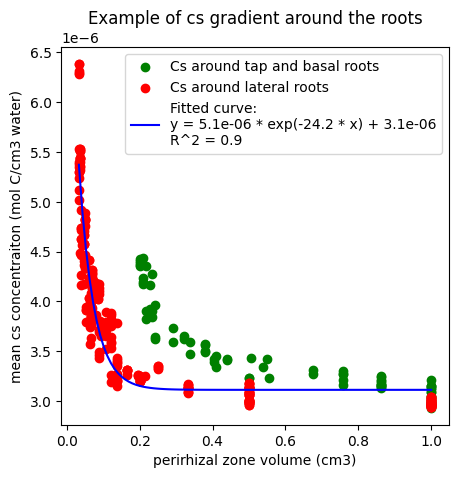

initial slope 0.0001228695381702222


In [402]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# [list( survivors)[0]]
# Sample data
df_data = df[(df['pSet']==list( survivors)[0])&((df['st']==1)|((df['st']==2)))]
x_data = df_data['vol']
y_data = df_data['cs']


df_data_ = df[(df['pSet']==list( survivors)[0])&((df['st']!=1)&((df['st']!=2)))]
x_data_ = df_data_['vol']
y_data_ = df_data_['cs']

# Define a negative exponential function
def negative_exponential(x,a,  b, c):
    return a * np.exp(-b * x) + c

# Use curve_fit to find the best parameters
# Provide initial guesses for a and b
initial_guess = [max(y_data)-min(y_data), 2, min(y_data)]
params, covariance = curve_fit(negative_exponential, x_data, y_data, p0=initial_guess)

# Extract the parameters
a_fit, b_fit, c_fit = params

print(f"Fitted parameters: a = {a_fit}, b = {b_fit}, c = {c_fit}")

# Plot the data and the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)  # Finer x range for a smooth curve
y_fit = negative_exponential(x_fit, a_fit, b_fit, c_fit)


print('covariance',np.sqrt(np.diag(covariance)),np.linalg.cond(covariance)) 
# over parametrized...
residuals = y_data- negative_exponential(x_data, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print('r_squared',r_squared) # but accurate


plt.scatter(x_data_, y_data_, label="Cs around tap and basal roots", color='g') 
plt.scatter(x_data, y_data, label="Cs around lateral roots", color='r')  # Original data
#
plt.plot(x_fit, y_fit, 
         label=f"Fitted curve:\ny = {a_fit:.1e} * exp(-{b_fit:.1f} * x) + {c_fit:.1e}\nR^2 = {r_squared:.1f}", color='b')  # Fitted curve
plt.xlabel("perirhizal zone volume (cm3)")
plt.ylabel("mean cs concentraiton (mol C/cm3 water)")
plt.title("Example of cs gradient around the roots")
plt.legend()
plt.show()

# derivatie : y' = -a *b exp(-b*x)
# y'(0) = -a*b id the initial slope
print('initial slope', a_fit * b_fit)

In [348]:
56 in survivors

True

for pset 27 r_squared 3.660791381143724e-08 initial slope 4.540490576271393e-12


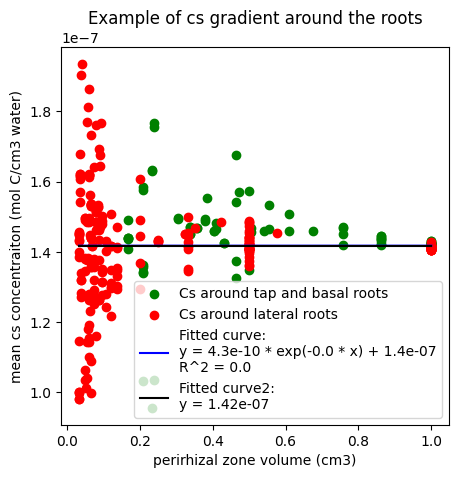

for pset 34 r_squared 0.18639955495901595 initial slope 1.1621007194673044e-07


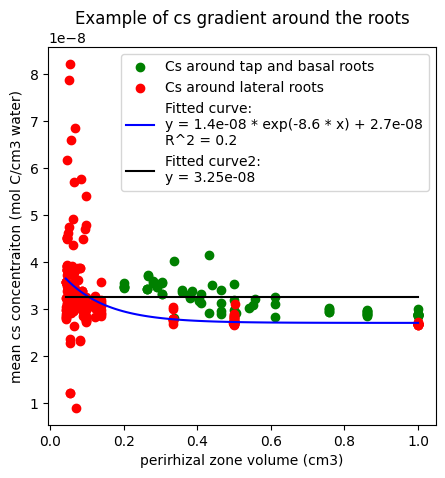

for pset 38 r_squared 0.06100325073996771 initial slope 4.4851431352863775e-06


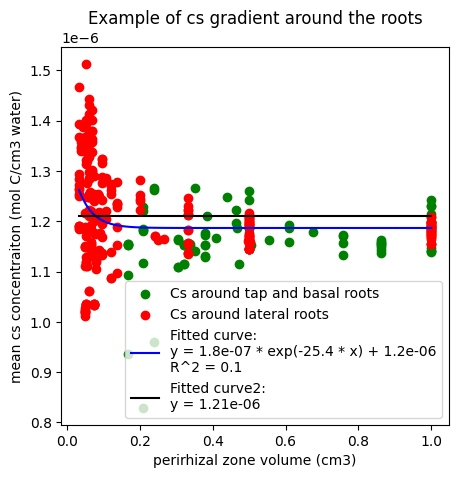

for pset 45 r_squared 0.7135696069009154 initial slope 4.8874455528420796e-06


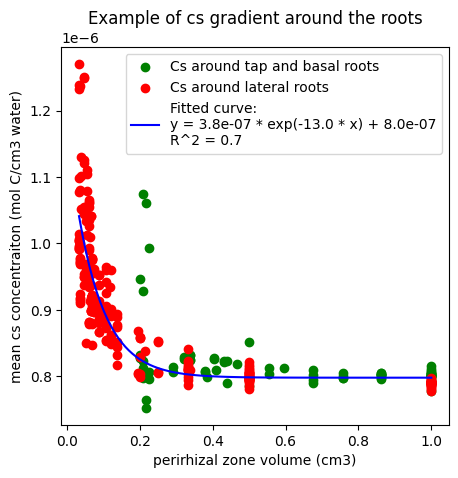

for pset 47 r_squared 0.6040462358439396 initial slope 1.2119421433933683e-05


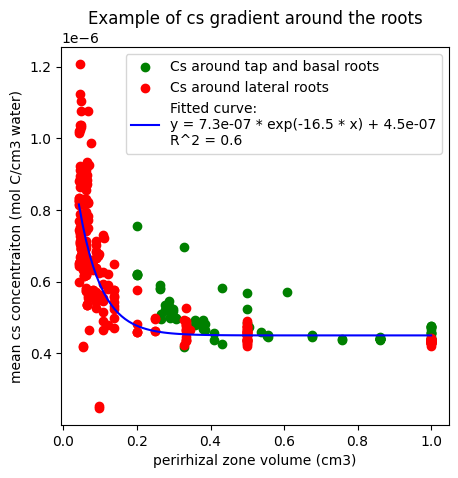

for pset 56 r_squared 0.2187302337143916 initial slope -386273024.9730532


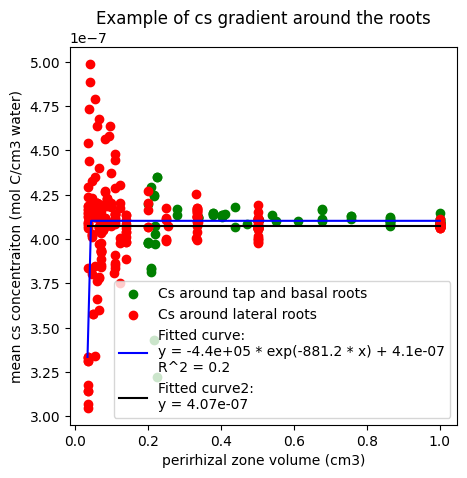

for pset 60 r_squared 0.6471523263167953 initial slope 1.372925777706207e-05


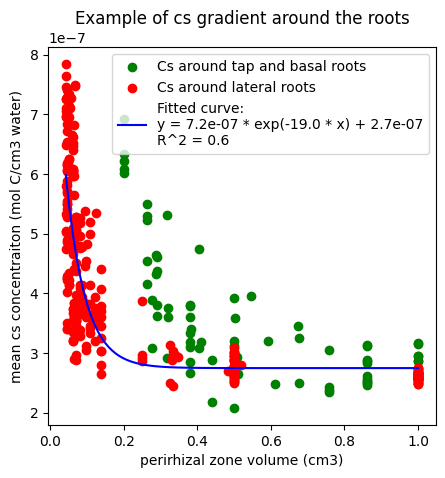

In [403]:
        
# Define a negative exponential function
def negative_exponential(x,a,  b, c):
    return a * np.exp(-b * x) + c

def constant(b,x):
    return np.full(x.shape,b)

def getInitcurve(df, psets= survivors):

    df['cs_slope'] = np.nan
    df['r_squared'] = np.nan
    for pepe in survivors:#df['pSet'].unique():
        # Sample data
        df_data = df[(df['pSet']==pepe)&((df['st']==1)|((df['st']==2)))]
        x_data = df_data['vol']
        y_data = df_data['cs']
        
        df_data_ = df[(df['pSet']==pepe)&((df['st']!=1)&((df['st']!=2)))]
        x_data_ = df_data_['vol']
        y_data_ = df_data_['cs']

        # Use curve_fit to find the best parameters
        # Provide initial guesses for a and b
        initial_guess = [max(y_data)-min(y_data), 2, min(y_data)]
        params, covariance = curve_fit(negative_exponential, x_data, y_data, p0=initial_guess)

        # Extract the parameters
        a_fit, b_fit, c_fit = params


        # Plot the data and the fitted curve
        x_fit = np.linspace(min(x_data), max(x_data), 100)  # Finer x range for a smooth curve
        y_fit = negative_exponential(x_fit, a_fit, b_fit, c_fit)
        residuals = y_data- negative_exponential(x_data, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y_data-np.mean(y_data))**2)
        r_squared = 1 - (ss_res / ss_tot)

        cs_slope = a_fit * b_fit
        
        if r_squared < 0.6:
            print('for pset',pepe, 'r_squared',r_squared,'initial slope', a_fit * b_fit)
            plt.scatter(x_data_, y_data_, label="Cs around tap and basal roots", color='g') 
            plt.scatter(x_data, y_data, label="Cs around lateral roots", color='r')  # Original data
            #
            plt.plot(x_fit, y_fit, 
                     label=f"Fitted curve:\ny = {a_fit:.1e} * exp(-{b_fit:.1f} * x) + {c_fit:.1e}\nR^2 = {r_squared:.1f}", color='b')  # Fitted curve

            

            # Plot the data and the fitted curve
            x_fit = np.linspace(min(x_data), max(x_data), 100)  # Finer x range for a smooth curve
            
            y_fit = constant(np.mean(y_data),x_fit)
            
            plt.plot(x_fit, y_fit, 
                     label=f"Fitted curve2:\ny = {np.mean(y_data):.2e}", color='k')  # Fitted curve

            
            plt.xlabel("perirhizal zone volume (cm3)")
            plt.ylabel("mean cs concentraiton (mol C/cm3 water)")
            plt.title("Example of cs gradient around the roots")
            plt.legend()
            plt.show()
            cs_slope = 0
            r_squared= 1
            
            
        if r_squared < 0.8:
            print('for pset',pepe, 'r_squared',r_squared,'initial slope', a_fit * b_fit)
            plt.scatter(x_data_, y_data_, label="Cs around tap and basal roots", color='g') 
            plt.scatter(x_data, y_data, label="Cs around lateral roots", color='r')  # Original data
            #
            plt.plot(x_fit, y_fit, 
                     label=f"Fitted curve:\ny = {a_fit:.1e} * exp(-{b_fit:.1f} * x) + {c_fit:.1e}\nR^2 = {r_squared:.1f}", color='b')  # Fitted curve

            

            
            plt.xlabel("perirhizal zone volume (cm3)")
            plt.ylabel("mean cs concentraiton (mol C/cm3 water)")
            plt.title("Example of cs gradient around the roots")
            plt.legend()
            plt.show()

        df.loc[(df['pSet']==pepe), 'cs_slope']= cs_slope
        df.loc[(df['pSet']==pepe),'r_squared'] = r_squared
        
getInitcurve(df)

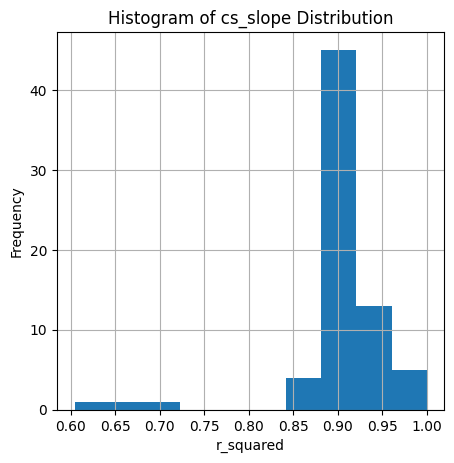

In [404]:
df_temp = df[['pSet','cs_slope','r_squared']].drop_duplicates()

# Create a histogram from the 'age' column
df_temp['r_squared'].hist()  # You can adjust 'bins' for more or less granularity

# Adding labels and title for better visualization
plt.xlabel('r_squared')
plt.ylabel('Frequency')
plt.title('Histogram of cs_slope Distribution')

# Show the histogram
plt.show()
df_temp = df[['pSet','cs_slope','r_squared']].drop_duplicates()

In [351]:
print(df_temp[abs(df_temp['cs_slope']-0.0001) == np.nanmin(abs(df_temp['cs_slope']-0.0001) )],
     df_temp[abs(df_temp['cs_slope']-0.00006) == np.nanmin(abs(df_temp['cs_slope']-0.00006) )],
     df_temp[df_temp['cs_slope'] == np.nanmax(df_temp['cs_slope'])])

      pSet  cs_slope  r_squared
24119   73    0.0001   0.909159       pSet  cs_slope  r_squared
13105   40  0.000061   0.916122      pSet  cs_slope  r_squared
5587   17  0.000205   0.896802


In [352]:
print(
    repr(np.array(list(df_temp.loc[
        (df_temp['cs_slope']>0.00009)&(df_temp['cs_slope']<0.000124),'pSet']))))

array([ 1, 12, 19, 22, 26, 30, 51, 54, 58, 63, 67, 68, 71, 72, 73, 77, 81,
       85, 90, 94])


In [353]:
print(
    repr(np.array(list(df_temp.loc[
        (df_temp['cs_slope']>0.00005)&(df_temp['cs_slope']<0.000075),'pSet']))))

array([ 5, 13, 16, 23, 40, 46, 52, 53, 57, 70, 92])


In [354]:
df_temp.loc[df_temp['pSet']==44,'cs_slope']

14431    0.000015
Name: cs_slope, dtype: float64

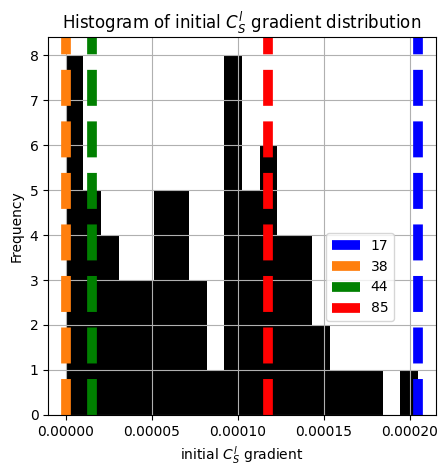

In [453]:

#df_temp = df_temp[df_temp['pSet']!=56]
# Create a histogram from the 'age' column
df_temp['cs_slope'].hist(bins = 20, color ='k')  # You can adjust 'bins' for more or less granularity
plt.axvline(x=df_temp.loc[df_temp['pSet']==17,'cs_slope'].unique()[0], 
            label= "17",color='blue',  linewidth=7, 
            linestyle='--')
plt.axvline(x=df_temp.loc[df_temp['pSet']==38,'cs_slope'].unique()[0], 
            label= "38",color='tab:orange',  linewidth=7, 
            linestyle='--')
plt.axvline(x=df_temp.loc[df_temp['pSet']==44,'cs_slope'].unique()[0], 
            label= "44",color='g',  linewidth=7, 
            linestyle='--')
plt.axvline(x=df_temp.loc[df_temp['pSet']==85,'cs_slope'].unique()[0], 
            label= "85",color='r', linewidth=7, 
            linestyle='--')
#for ii in [27,34, 42, 45, 48, 56, 60]:
#    plt.axvline(x=df_temp.loc[df_temp['pSet']==ii,'cs_slope'].unique()[0], 
#                color='k', linestyle='--')
#plt.axvline(x=0.000124, 
#            color='k', linestyle='--')
#plt.axvline(x=0.00009, 
#            color='k', linestyle='--')
#plt.axvline(x=0.00005, 
#            color='y', linestyle='--')
#plt.axvline(x=0.000075, 
#            color='y', linestyle='--')
# Adding labels and title for better visualization
plt.legend(bbox_to_anchor=(0.7, 0.5))
plt.xlabel('initial $C_S^l$ gradient')
plt.ylabel('Frequency')
plt.title('Histogram of initial $C_S^l$ gradient distribution')

# Show the histogram
plt.savefig('histcsslopte.png')
plt.show()

In [389]:
repr(np.array(df_temp.loc[df_temp['cs_slope']>0.000075,'pSet']))

'array([1, 3, 4, 6, 7, 8, 12, 17, 18, 19, 22, 26, 28, 30, 33, 37, 49, 51,\n       54, 58, 61, 63, 65, 67, 68, 71, 72, 73, 77, 81, 84, 85, 88, 90, 93,\n       94], dtype=object)'

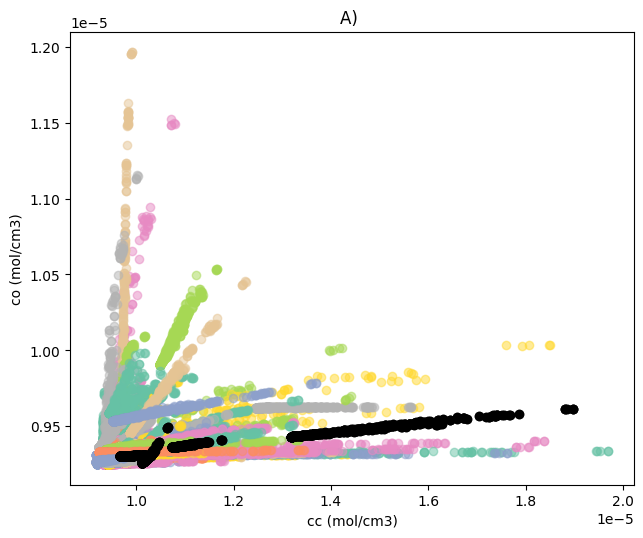

In [407]:

markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
def olgvscopo(df, unique_values=None):
    doBlack = False
    if unique_values is None:
        doBlack = True
        unique_values = df["pSet"].drop_duplicates()
    rgb_values = sns.color_palette("Set2", 99)
    color_map = dict(zip(df['pSet'].drop_duplicates(),rgb_values))
    #markers_map = dict(zip(df['scenario' ].drop_duplicates(),markers))

    for value in unique_values:
        subset = df[df["pSet"] == value]  # Select subset where 'pSet' equals the current value
        col =color_map[subset['pSet'].unique()[0]]
        edgecolors=  (0.0, 0.0, 0.0)
        if doBlack:
            if value in [17,38,44,85]:#pSet2Keep:
                col = (0.0, 0.0, 0.0)
                edgecolors=  (1,1,1)
        col = colors.to_hex(col)
        #mm = markers_map[subset['scenario'].unique()[0]]
        plt.scatter(subset['cc'], subset['co'], alpha=0.5, 
                    c = col,#marker=mm,
                    label=f'{value}' #color_map[value]
                   )
    if doBlack:
        for value in [17,38,44,85]:#pSet2Keep:
            subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value

            col = (0.0, 0.0, 0.0)
            edgecolors=  (1,1,1)
            col = colors.to_hex(col)
            plt.scatter(subset['cc'], subset['co'], alpha=1, 
                        c = col ,zorder=100#color_map[value]
                       )
    
    ##plt.legend()
    # Add labels and legend
    plt.xlabel('cc (mol/cm3)')
    plt.ylabel('co (mol/cm3)')
    #plt.xlabel('cc (mg C/g soil mineral)')
    #plt.ylabel('co (mg C/g soil mineral)')

    #plt.show()

plt.figure(figsize=(8*2, 6*1))
plt.subplot(1, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)
olgvscopo(df)

In [9]:

def bin_(dataframe, independent_variable, dependent_variable, num_bins):
    # Step 1: Define the range of each bin for the independent variable
    #bin_ranges = pd.cut(dataframe[independent_variable], bins=num_bins, include_lowest=True)
    
    #hist, bin_vales = np.histogram(dataframe[independent_variable], bins=num_bins)
    bin_vales = np.linspace(-25,0,num_bins)
    bin_ranges = pd.cut(dataframe[independent_variable], bins=bin_vales)#, include_lowest=True)
    # Step 2: Group the dataframe according to the bin ranges
    dataframe[dependent_variable+"_"]=dataframe[dependent_variable]*dataframe["vol"]
    grouped = dataframe.groupby(bin_ranges)

    # Step 3: Compute the sum of dependent variable for each bin and the mean of the independent variable
    bin_meansZ = grouped[independent_variable].mean()#bin_vales[:-1]+np.diff(bin_vales)# 
    bin_meansX = (grouped[dependent_variable+"_"]).sum()/(grouped["vol"]).sum()
    return bin_meansZ.dropna(), bin_meansX.dropna()
def bin_and_plot(dataframe, independent_variable, dependent_variable, num_bins,
                 nrows, ncols, indexsubplot, unit=None, doLogX=False,
                 doLogY=False, colVar = None, mysets=None,keeplim=True,xlabels=None):
    if colVar is not None:
        maxV = dataframe[colVar].max()
        minV = dataframe[colVar].min()
        
    # Create the plot
    #plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.subplot(nrows, ncols, indexsubplot)
    # Loop to plot each line
    allsets = dataframe["pSet"].unique()
    #print('ames',max( dataframe[dataframe['pSet'] in np.array(mysets)][dependent_variable]))
    for i in allsets:
        df_ = dataframe[dataframe['pSet']==i].copy()
        bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable, 
                                      num_bins)
        plt.plot( bin_meansX.values, bin_meansZ,c='k')
    for i in mysets:
        df_ = dataframe[dataframe['pSet']==i].copy()
        bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable, 
                                      num_bins)
        plt.plot( bin_meansX.values, bin_meansZ,label=f'{i}',linewidth=7.0)
            
    if unit is None:
        unit = 'mol/cm3'
    if keeplim == True:
        plt.xlim(np.min(dataframe[dependent_variable])*0.95, np.max(dataframe[dependent_variable])*1.05)
    plt.ylabel('Mean depth (cm)', fontsize=20)
    plt.yticks(fontsize=18)
    if xlabels is None:
        plt.xlabel('Mean ' + dependent_variable+' ('+unit+')', fontsize=20)
    else:
        
        plt.xlabel('Mean ' + xlabels[dependent_variable]+' ('+unit+')', fontsize=20)
    plt.xticks(rotation=30, fontsize=18)
    #plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    if doLogY:
        plt.yscale('log')
    if doLogX:
        plt.xscale('log')
    if colVar is not None:
        plt.title(chr(ord('@')+indexsubplot)+") ", fontsize=22)#+colVar)
    else:
        plt.title(chr(ord('@')+indexsubplot)+") ", fontsize=22)#+colVar)
        if indexsubplot == 2:
            plt.legend(loc="lower right", fontsize=22)
            #pass
    plt.grid(True)
    
    plt.tight_layout()
    

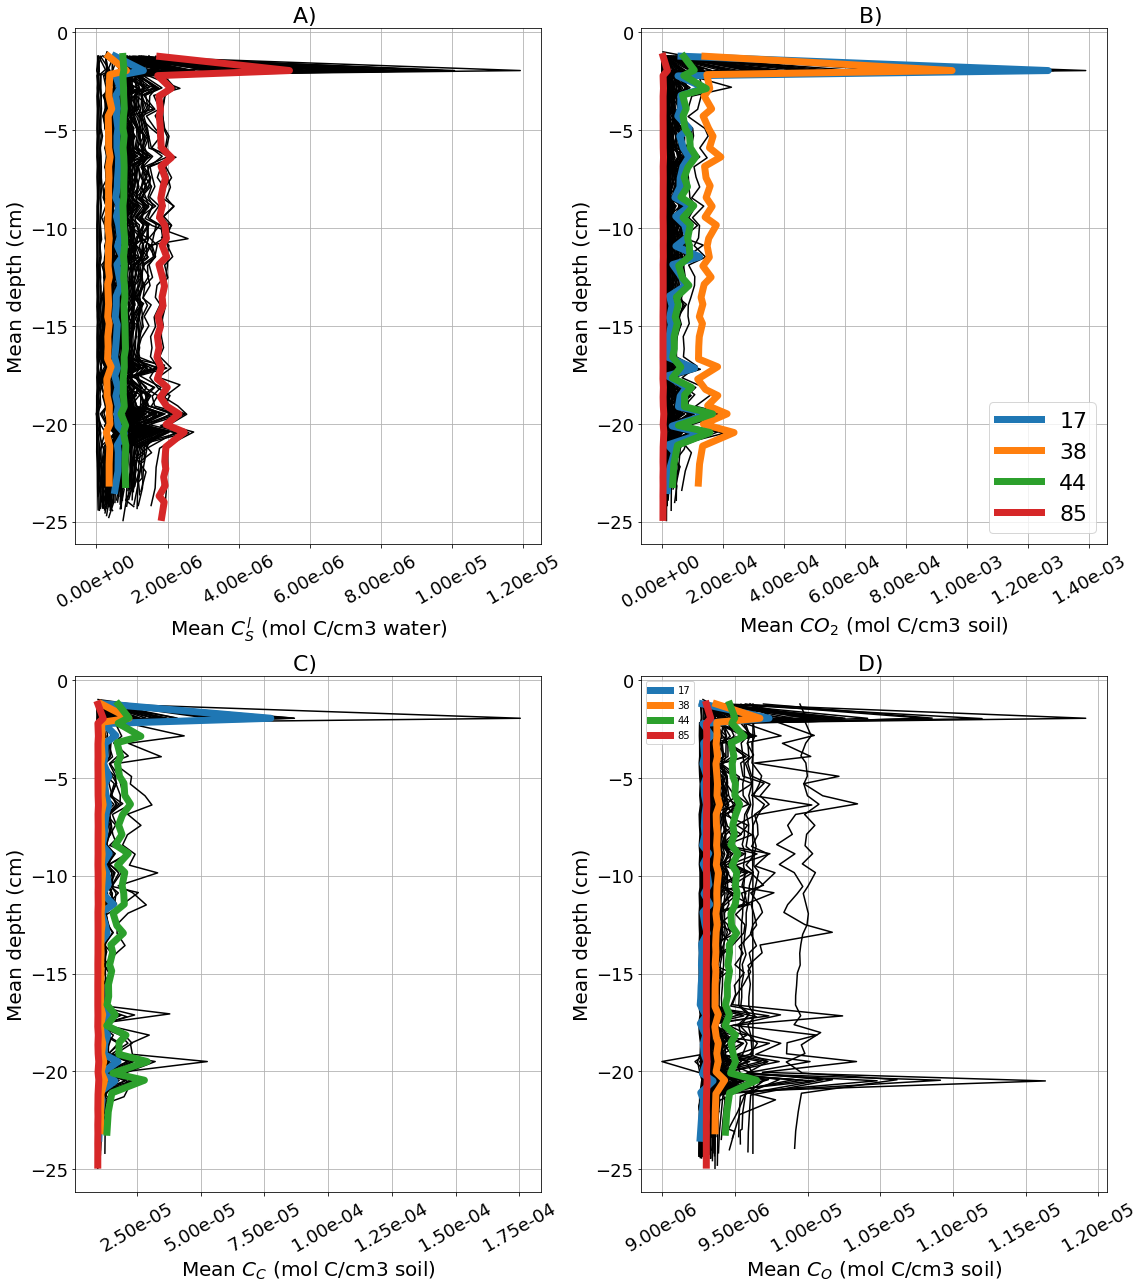

In [10]:
colvars =None# 'CS_init'
dfa['height'] = dfa['yZ']
mg_per_mol = 12.011 *1000 # g/mol

solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
solidMolarMass = 60.08e-3 # [kg/mol] 

# theta_r, theta_s, alpha, n, Ks
soil =  [0.08, 0.43, 0.04, 1.6, 50]#[0.045, np.nan, 0.04, 1.6, 50]

# [mol / m3 solid] =[kg/m^3 solid] / [kg/mol] 
solidMolDensity = solidDensity/solidMolarMass
# [mol / m3 scv] = [mol / m3 solid] * [m3 solid /m3 space]
bulkDensity_m3 = solidMolDensity*(1.- soil[1])
bulkDensity_cm3 = bulkDensity_m3 / 1e6 # [mol / cm3 scv] 
# g soil/cm3 soil
solidDensity_gcm3 = solidDensity/1e6*1000 # [kg/m^3 solid] * [m3/cm3] * [g/kg]
dfa['CLl']=dfa['cs_']#*dfa['vol']
dfa['cs_/css']=dfa['cs_']/dfa['css']
idsplot = [1,2,3,4]
units = [ 'mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'CLl': '$C_S^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['CLl','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(dfa, 'height', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 colVar= colvars, 
                 unit = units[nn],keeplim=False,
                xlabels=xlabels,
                mysets=[17,38,44,85]#pSet2Keep+[38,44,56]
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99set.png')
plt.show()

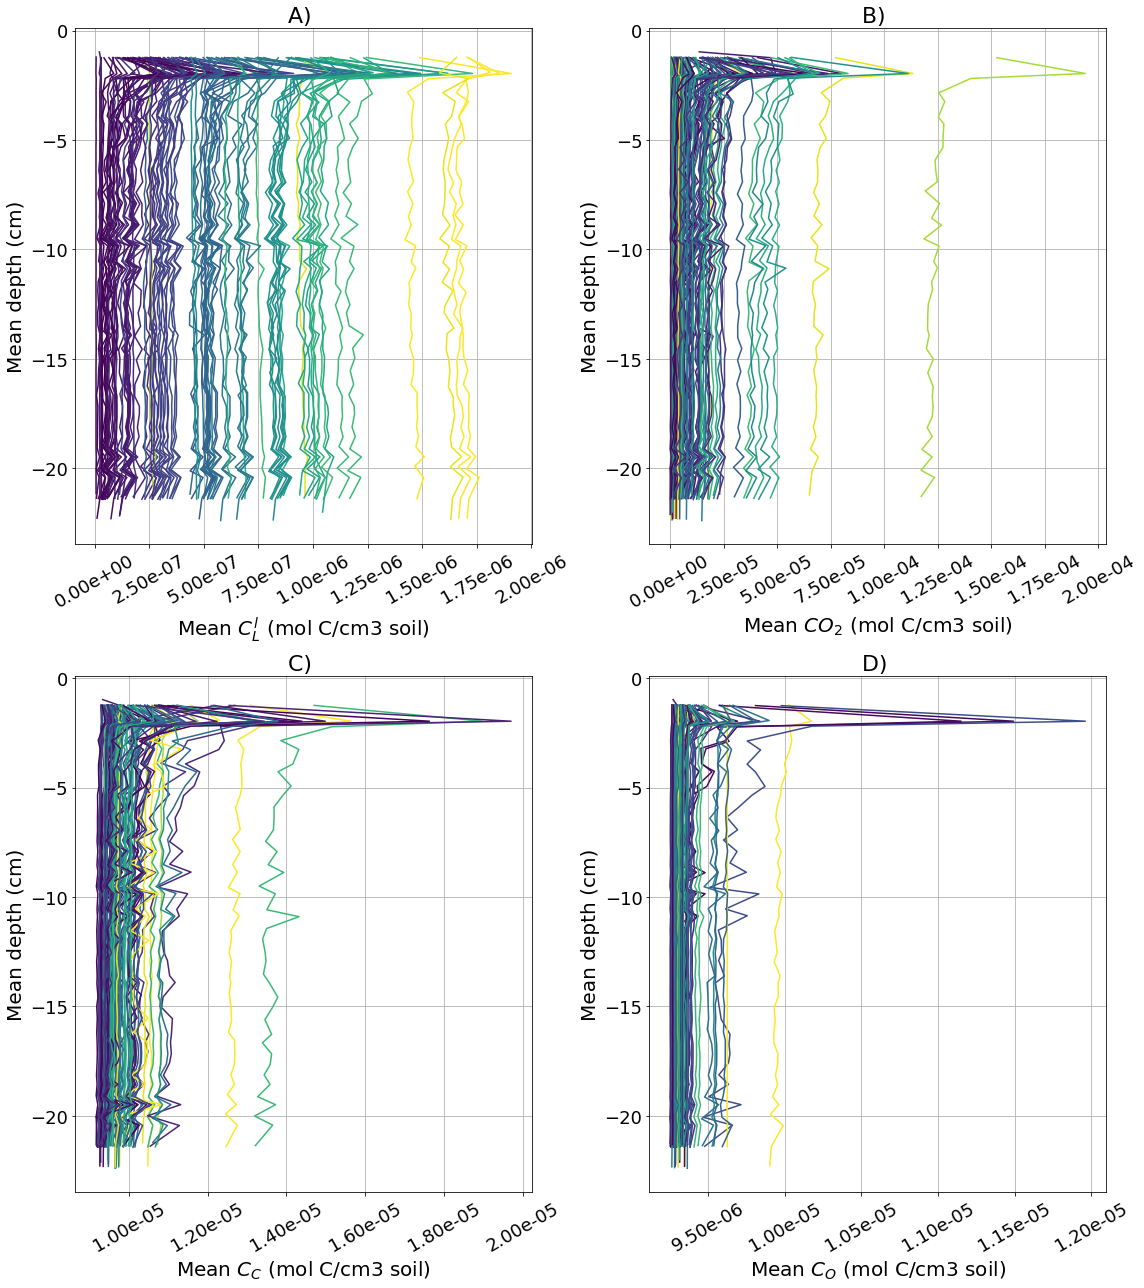

In [33]:
colvars = 'CS_init'
dfa['height'] = dfa['yZ']
mg_per_mol = 12.011 *1000 # g/mol

solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
solidMolarMass = 60.08e-3 # [kg/mol] 

# theta_r, theta_s, alpha, n, Ks
soil =  [0.08, 0.43, 0.04, 1.6, 50]#[0.045, np.nan, 0.04, 1.6, 50]

# [mol / m3 solid] =[kg/m^3 solid] / [kg/mol] 
solidMolDensity = solidDensity/solidMolarMass
# [mol / m3 scv] = [mol / m3 solid] * [m3 solid /m3 space]
bulkDensity_m3 = solidMolDensity*(1.- soil[1])
bulkDensity_cm3 = bulkDensity_m3 / 1e6 # [mol / cm3 scv] 
# g soil/cm3 soil
solidDensity_gcm3 = solidDensity/1e6*1000 # [kg/m^3 solid] * [m3/cm3] * [g/kg]
dfa['CLl']=dfa['cs_']#*dfa['vol']
dfa['cs_/css']=dfa['cs_']/dfa['css']
idsplot = [1,2,3,4]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'CLl': '$C_L^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
dfa_ = dfa#[dfa['pSet']!='19'].copy()
for nn, dep in enumerate(['CLl','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(dfa_, 'height', dep, 50,
                2,2, idsplot[nn], 
                 colVar= colvars, unit = units[nn],
                 keeplim=False,
                xlabels=xlabels)#[nn])
    
plt.show()

In [376]:
dfadeep = dfa_[(dfa_['height']<-15)&(dfa_['pSet']!=38)&(dfa_['pSet']!=44)]
dfadeep.loc[dfadeep['co2']==max(dfadeep['co2']),'pSet']

7051    21
Name: pSet, dtype: object

In [377]:
dfadeep.loc[dfadeep['cc']==max(dfadeep['cc']),'pSet']

5118    15
Name: pSet, dtype: object

In [420]:
dfa_

wat            cs        cl           coa       cod           cca  \
0      0.042200  1.769464e-06  0.000930  1.536820e-06  0.000008  7.663405e-08   
1      0.007057  3.656621e-06  0.000930  3.629278e-06  0.000006  8.930399e-08   
2      0.007925  2.904982e-06  0.000914  1.879204e-06  0.000008  7.242011e-08   
3      0.007934  2.886543e-06  0.000932  1.938638e-06  0.000008  7.261019e-08   
4      0.007153  2.977854e-06  0.000929  2.086925e-06  0.000007  7.352088e-08   
...         ...           ...       ...           ...       ...           ...   
32882  0.107885  2.747954e-07  0.000675  1.620493e-07  0.000009  2.301061e-08   
32883  0.007677  1.104116e-06  0.000674  4.999040e-07  0.000009  2.299005e-07   
32884  0.071296  3.577060e-07  0.000675  2.004288e-07  0.000009  4.670906e-08   
32885  0.026857  3.733705e-07  0.000673  2.057956e-07  0.000009  4.221673e-08   
32886  0.217664  2.118259e-07  0.000675  1.458237e-07  0.000009  1.665529e-08   

            ccd      css2           co2        yX  ...   co_mass   cc_mass  \
0      0.000009  0.000040  4.910611e-06 -0.298434  ...  0.075531  0.074171   
1      0.000009  0.000081  5.259248e-06  0.043922  ...  0.077171  0.074203   
2      0.000009  0.000064  4.899655e-06 -0.447197  ...  0.075823  0.074157   
3      0.000009  0.000064  4.929892e-06 -0.104340  ...  0.075976  0.074159   
4      0.000009  0.000066  4.955045e-06 -0.125120  ...  0.076127  0.074160   
...         ...       ...           ...       ...  ...       ...       ...   
32882  0.000009  0.000006  7.745992e-07 -0.460229  ...  0.073687  0.072992   
32883  0.000009  0.000026  1.128065e-05  0.277925  ...  0.073775  0.074782   
32884  0.000009  0.000008  2.282210e-06 -0.246504  ...  0.073700  0.073250   
32885  0.000009  0.000009  2.069641e-06 -0.346692  ...  0.073702  0.073212   
32886  0.000009  0.000005  6.510157e-07  0.165009  ...  0.073684  0.072972   

       coa_mass  cod_mass  cca_mass  ccd_mass  css2_mass     height  \
0      0.012220  0.063310  0.000609  0.073562   0.314108  -1.204434   
1      0.028859  0.048313  0.000710  0.073493   0.645937  -2.113870   
2      0.014943  0.060880  0.000576  0.073581   0.512257  -2.971433   
3      0.015415  0.060561  0.000577  0.073581   0.509316  -3.905582   
4      0.016595  0.059532  0.000585  0.073575   0.523902  -4.901093   
...         ...       ...       ...       ...        ...        ...   
32882  0.001289  0.072398  0.000183  0.072809   0.049300  -6.586450   
32883  0.003975  0.069799  0.001828  0.072954   0.204330  -4.083066   
32884  0.001594  0.072106  0.000371  0.072878   0.066161  -5.060581   
32885  0.001636  0.072066  0.000336  0.072877   0.069050 -16.183353   
32886  0.001160  0.072524  0.000132  0.072839   0.039180 -11.401191   

                CLl   cs_/css  
0      3.733566e-07  0.009452  
1      7.741084e-07  0.009529  
2      6.276061e-07  0.009742  
3      6.133331e-07  0.009576  
4      6.363822e-07  0.009659  
...             ...       ...  
32882  5.902292e-08  0.009520  
32883  2.349603e-07  0.009144  
32884  7.635250e-08  0.009176  
32885  8.272856e-08  0.009527  
32886  4.610678e-08  0.009357  

[32887 rows x 68 columns]

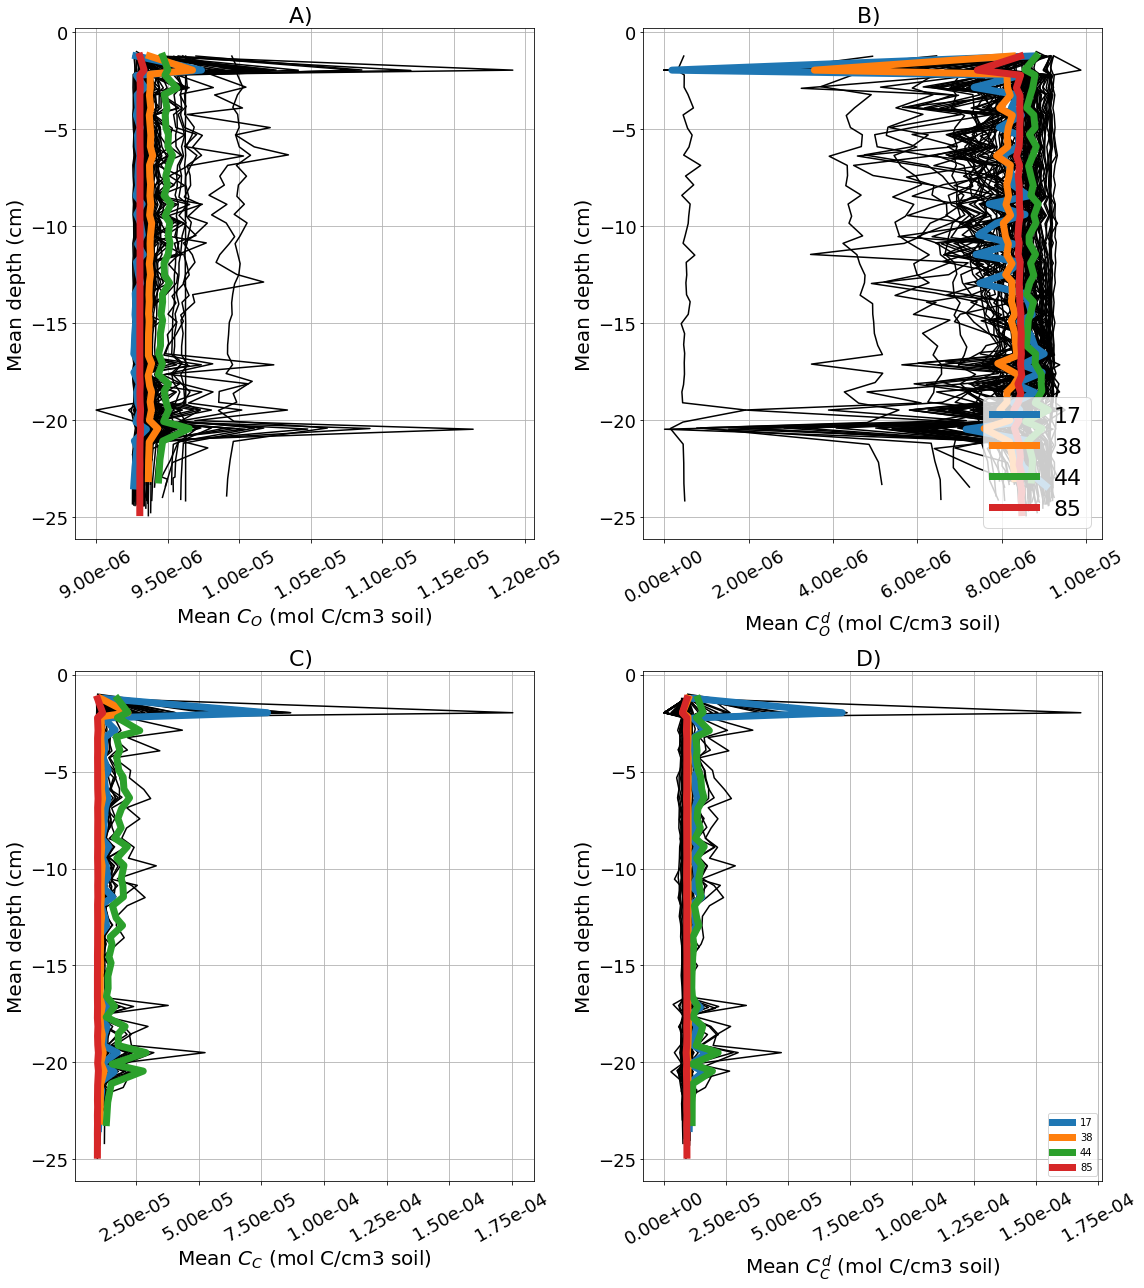

In [13]:
if False:
    units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
    xlabels = {'cod': '$C_O^d$','ccd': '$C_C^d$','cc': '$C_C$','co': '$C_O$' } 

    plt.figure(figsize=(8*2, 6*3))
    for nn, dep in enumerate(['co','cod','cc','ccd']): #(['CHl','css','cs_/css']):
        bin_and_plot(dfa_, 'height', dep, 50,
                    2,2, idsplot[nn], 
                     colVar= colvars, unit = units[nn],
                     keeplim=False,
                     mysets=pSet2Keep,
                    xlabels=xlabels)#[nn])

    plt.show()
    
colvars =None# 'CS_init'
dfa['height'] = dfa['yZ']
mg_per_mol = 12.011 *1000 # g/mol

solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
solidMolarMass = 60.08e-3 # [kg/mol] 

# theta_r, theta_s, alpha, n, Ks
soil =  [0.08, 0.43, 0.04, 1.6, 50]#[0.045, np.nan, 0.04, 1.6, 50]

# [mol / m3 solid] =[kg/m^3 solid] / [kg/mol] 
solidMolDensity = solidDensity/solidMolarMass
# [mol / m3 scv] = [mol / m3 solid] * [m3 solid /m3 space]
bulkDensity_m3 = solidMolDensity*(1.- soil[1])
bulkDensity_cm3 = bulkDensity_m3 / 1e6 # [mol / cm3 scv] 
# g soil/cm3 soil
solidDensity_gcm3 = solidDensity/1e6*1000 # [kg/m^3 solid] * [m3/cm3] * [g/kg]
dfa['CLl']=dfa['cs_']#*dfa['vol']
dfa['cs_/css']=dfa['cs_']/dfa['css']
idsplot = [1,2,3,4]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cod': '$C_O^d$','ccd': '$C_C^d$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['co','cod','cc','ccd']): #(['CLl','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(dfa, 'height', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 colVar= colvars, 
                 unit = units[nn],keeplim=False,
                xlabels=xlabels,
                mysets=[17,38,44,85]#pSet2Keep+[38,44,56]
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99set.png')
plt.show()

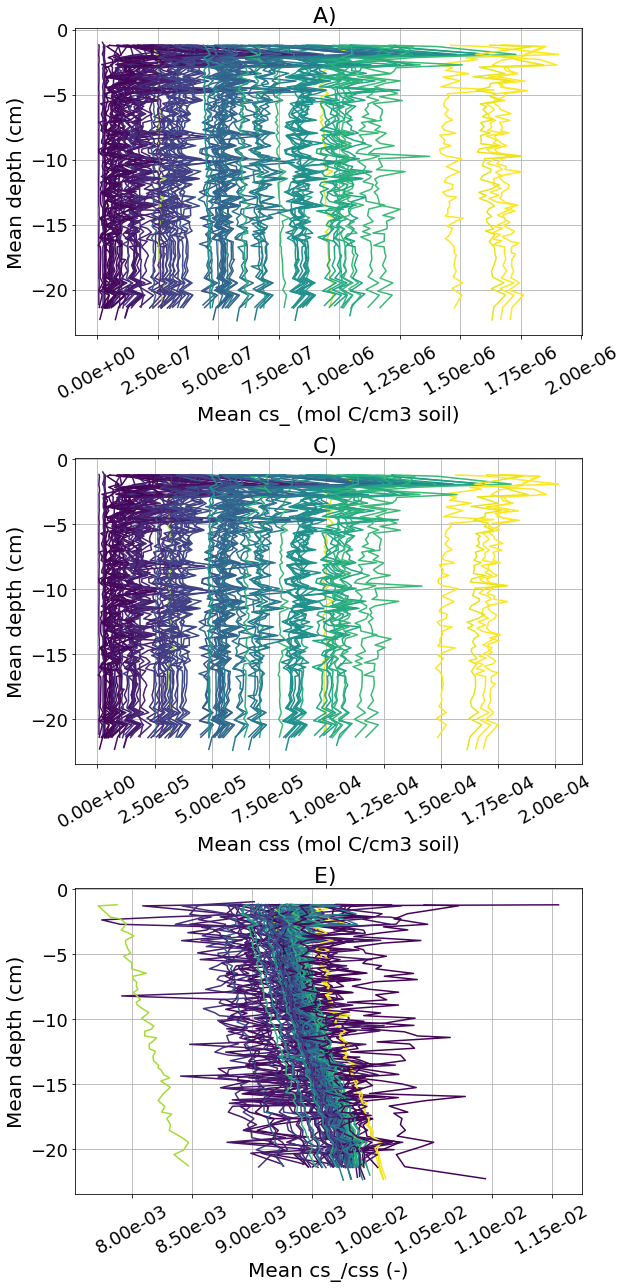

In [35]:
colvars = 'CS_init'
dfa['height'] = dfa['yZ']
mg_per_mol = 12.011 *1000 # g/mol

solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
solidMolarMass = 60.08e-3 # [kg/mol] 

# theta_r, theta_s, alpha, n, Ks
soil =  [0.08, 0.43, 0.04, 1.6, 50]#[0.045, np.nan, 0.04, 1.6, 50]

# [mol / m3 solid] =[kg/m^3 solid] / [kg/mol] 
solidMolDensity = solidDensity/solidMolarMass
# [mol / m3 scv] = [mol / m3 solid] * [m3 solid /m3 space]
bulkDensity_m3 = solidMolDensity*(1.- soil[1])
bulkDensity_cm3 = bulkDensity_m3 / 1e6 # [mol / cm3 scv] 
# g soil/cm3 soil
solidDensity_gcm3 = solidDensity/1e6*1000 # [kg/m^3 solid] * [m3/cm3] * [g/kg]

#dfa['cs_'] = dfa['cs']*dfa['theta']*mg_per_mol/solidDensity_gcm3
dfa['cl_'] = dfa['cl']*dfa['theta']#*mg_per_mol/solidDensity_gcm3
dfa['css'] = dfa['css2']#*mg_per_mol/solidDensity_gcm3
#dfa['cs_/css']=dfa['cs_']/dfa['css']
idsplot = [1,3,5]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','-']
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cs_','css','cs_/css']):
    bin_and_plot(dfa, 'height', dep, 100,
                 3, 2, idsplot[nn], 
                 colVar= colvars, 
                 unit = units[nn],keeplim=False)#[nn])
    

plt.show()

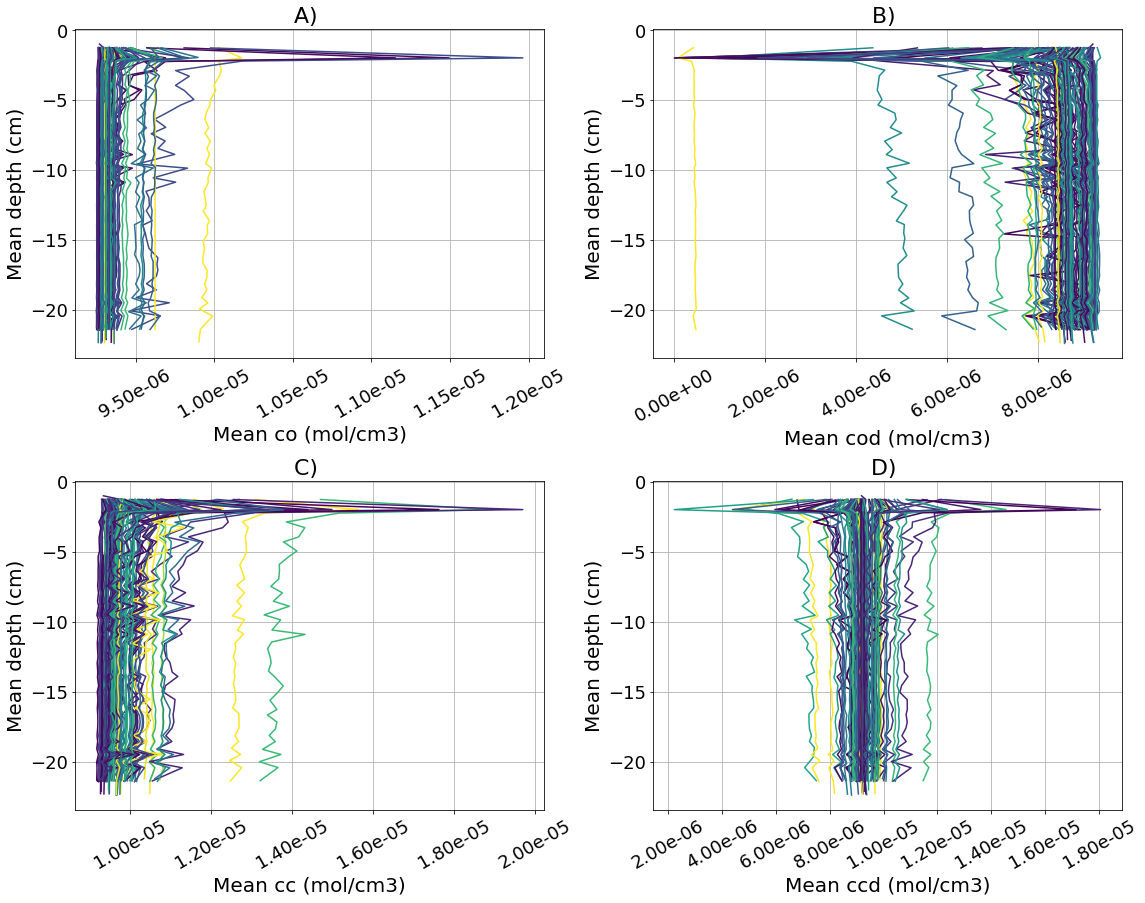

In [36]:
colvars = 'CS_init'

idsplot = [1,2,3,4]
plt.figure(figsize=(8*2, 6*4))
for nn, dep in enumerate(['co','cod','cc','ccd']):
    bin_and_plot(dfa, 'height', dep, 50,
                 4, 2, idsplot[nn], keeplim=False,
                 colVar= colvars)#[nn])
    

plt.show()

KeyError: 'height'

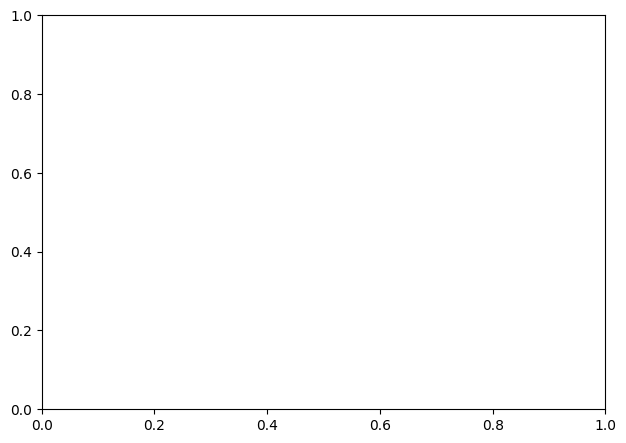

In [336]:
colvars = None#'CS_init'

idsplot = [1,2,3,4]
plt.figure(figsize=(8*2, 6*4))
for nn, dep in enumerate(['co','cod','cc','ccd']):
    bin_and_plot(dfa, 'height', dep, 50,
                 4, 2, idsplot[nn], keeplim=False,
                 mysets=[17,38,44,85],#pSet2Keep,
                 colVar= colvars
                )#[nn])
    

plt.show()

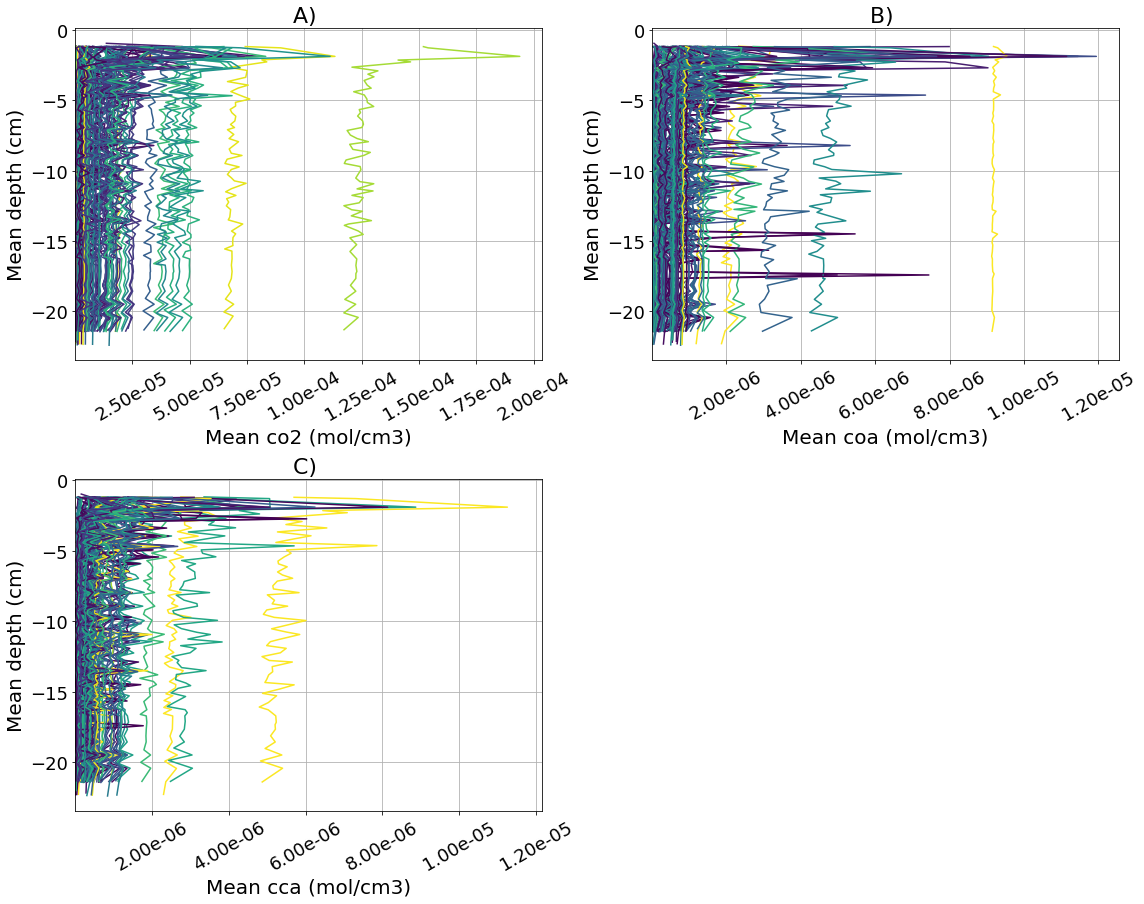

In [38]:
colvars ='CS_init'

idsplot = [1,2,3,4]
plt.figure(figsize=(8*2, 6*4))
for nn, dep in enumerate(['co2','coa','cca']):
    bin_and_plot(dfa, 'height', dep, 100,
                 4, 2, idsplot[nn],
                 colVar= colvars)#[nn])
    

plt.show()

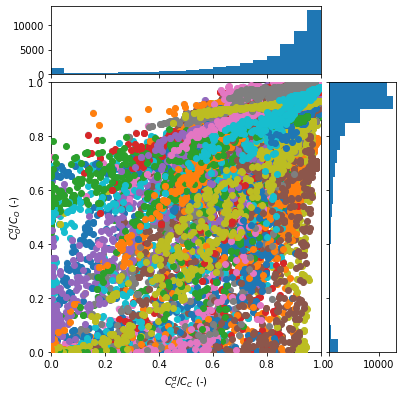

In [14]:
def scatter_hist(x, y,sets, ax, ax_histx, ax_histy,extra_val=None):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    
    ax.scatter(x, y,
               #c=df['vol'],
               alpha=0.3, edgecolors ='none')
 
    for vall in extra_val:#pSet2Keep:
        is5x = x[np.where(sets == vall)[0] ] # Select subset where 'pSet' equals the current value
        is5y = y[np.where(sets == vall)[0] ] # Select subset where 'pSet' equals the current value
        col = (0.0, 0.0, 0.0)
        ax.scatter(is5x, is5y, alpha=1, 
                    zorder=100,label=f'{vall}'#color_map[value]
                   )
    # now determine nice limits by hand:
    binwidth = 0.05
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth
    #ax.legend( bbox_to_anchor=(1.7, 1))
    bins = np.arange(-lim, lim + binwidth, binwidth)
    
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
# Start with a square Figure.


fig = plt.figure(figsize=(6, 6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])

ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#plt.title(chr(ord('@')+2)+") ")
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax.set_xlabel('$C_C^d/C_C$ (-)')
ax.set_ylabel('$C_O^d/C_O$ (-)')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# Draw the scatter plot and marginals.
scatter_hist((dfa['ccd'])/dfa['cc'],(dfa['cod'])/dfa['co'], 
             dfa['pSet'], ax, ax_histx, 
             ax_histy,df["pSet"].unique())


[]

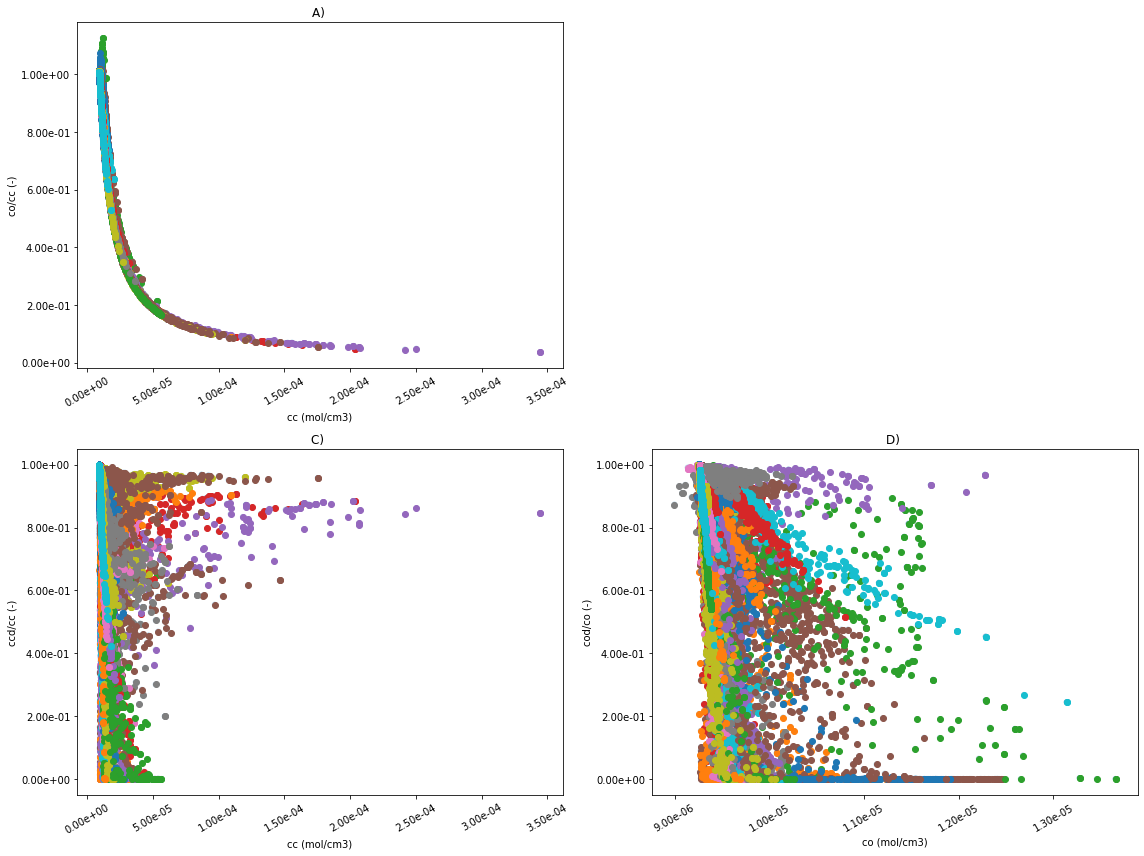

In [15]:
pSet2Keep = df["pSet"].unique()


plt.figure(figsize=(8*2, 6*2))
plt.subplot(2, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)

df=dfa
plt.scatter((df['cc']),(df['co'])/df['cc'], #np.log(df['cc']),np.log(df['co']), 
            #c=df['pSet'],
            alpha=0.3, edgecolors ='none')
for vall in pSet2Keep:
    subset = df[df['pSet'] == vall]  # Select subset where 'pSet' equals the current value
    plt.scatter((subset['cc']),(subset['co'])/subset['cc'], alpha=1, 
                zorder=100,label=f'{vall}'
               )
    ##plt.legend()
    
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title(nn)
#plt.colorbar()
plt.xlabel('cc (mol/cm3)')
plt.ylabel('co/cc (-)')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.xticks(rotation=30)


plt.subplot(2, 2, 3)
plt.title(chr(ord('@')+3)+") ")#+colVar)
plt.scatter((df['cc']),(df['ccd'])/df['cc'], #np.log(df['cc']),np.log(df['co']), 
            #c=df['pSet'],
            alpha=0.3, edgecolors ='none')
for vall in pSet2Keep:
    subset = df[df['pSet'] == vall]  # Select subset where 'pSet' equals the current value
    
    plt.scatter((subset['cc']),(subset['ccd'])/subset['cc'], alpha=1, 
                zorder=100,label=f'{vall}'
               )
    ##plt.legend()
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title(nn)
#plt.colorbar()
plt.xlabel('cc (mol/cm3)')
plt.ylabel('ccd/cc (-)')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.xticks(rotation=30)

#plt.legend()
plt.subplot(2, 2, 4)
plt.title(chr(ord('@')+4)+") ")#+colVar)

plt.scatter((df['co']),(df['cod'])/df['co'], #np.log(df['cc']),np.log(df['co']), 
            #c=df['pSet'],
            alpha=0.3, edgecolors ='none')
for vall in pSet2Keep:
    subset = df[df['pSet'] == vall]  # Select subset where 'pSet' equals the current value
    plt.scatter((subset['co']),(subset['cod'])/subset['co'], alpha=1, 
               zorder=100,label=f'{vall}'
               )
    ##plt.legend()
    
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title(nn)
#plt.colorbar()
plt.xlabel('co (mol/cm3)')
plt.ylabel('cod/co (-)')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.xticks(rotation=30)

plt.tight_layout()
plt.plot()

In [41]:
print(len(set( df['pSet'].unique())-psetCaCxa),
len(set( df['pSet'].unique())- psetCaCxa-pSethighCoCc))

90 90


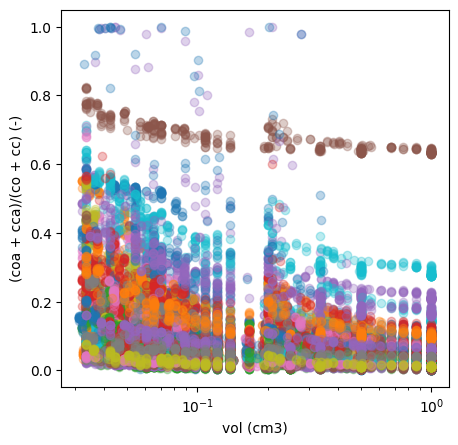

In [42]:
df = dfa
unique_values =set( df['pSet'].unique())#-psetCaCxa
#unique_values.add(57)
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    #col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cxa']/subset['cx'], alpha=0.3, 
               label=str(value)#, c = col
               )#color_map[value])

# Add labels and legend
plt.xscale('log')
plt.xlabel('vol (cm3)')
plt.ylabel('(coa + cca)/(co + cc) (-)')
##plt.legend(ncol=2, bbox_to_anchor=(1.02, 1))
plt.show()

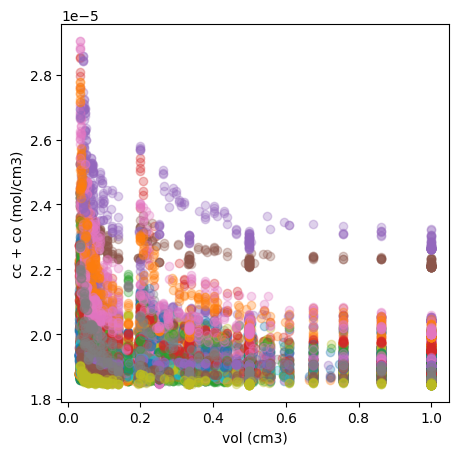

In [43]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cc'] + subset['co'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cc + co (mol/cm3)')
##plt.legend(ncol=2)
plt.show()

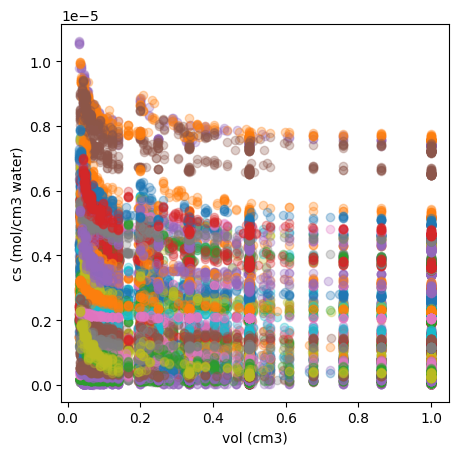

In [44]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc-pSethighC
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cs'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs (mol/cm3 water)')
##plt.legend(ncol=2)

plt.show()

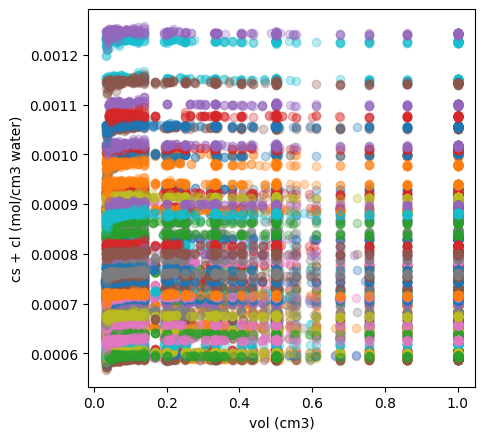

In [45]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc-pSethighC
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cs']+subset['cl'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs + cl (mol/cm3 water)')
##plt.legend(ncol=3)
plt.show()


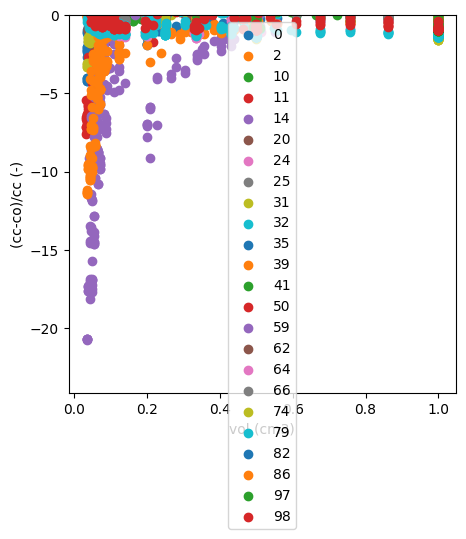

In [46]:

df=dfa#[]
unique_values =pSethighCoCcBis
#- psetCaCxa-pSethighCoCc-pSethighC-pSethighCoCcBis
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value].copy()  # Select subset where 'pSet' equals the current value
    subset['cc-co']= subset['cc']-subset['co']
    mehrCo = subset[subset['cc-co']<0]
    col = colors.to_hex(color_map[value])
    #print('pset',value, min(subset['cc-co']/subset['cc']))
    plt.scatter(subset['vol'], subset['cc-co']/subset['cc']*100, #alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])

# Add labels and legend
plt.ylim(top=0)
plt.xlabel('vol (cm3)')
plt.ylabel('(cc-co)/cc (-)')
plt.legend()
plt.show()


In [47]:
len(set( df['pSet'].unique())- set(psetCaCxa)-set(pSethighCoCc)-set(pSetLowCoCc)-set(pSethighC)-set(pSethighCoCcBis))

70

In [48]:
psetCaCxa

{9, 14, 15, 24, 29, 36, 39, 43, 50}

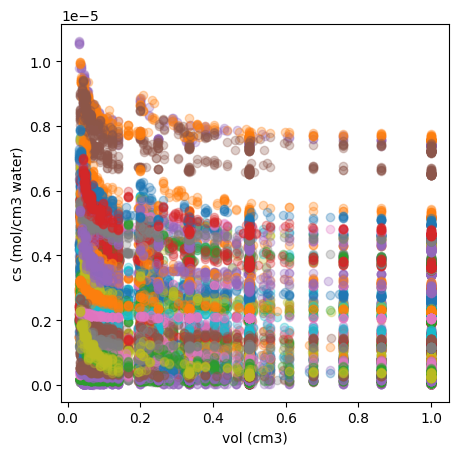

In [49]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc-pSethighC-pSethighCoCcBis
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cs'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs (mol/cm3 water)')
##plt.legend(ncol=2)

plt.show()

NameError: name 'randrange' is not defined

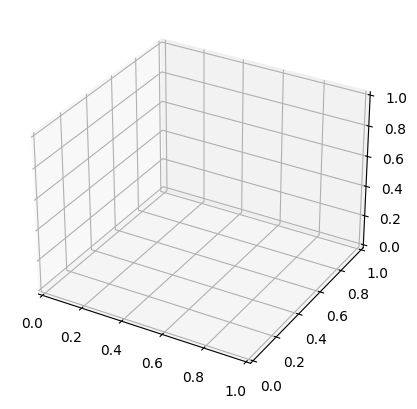

In [50]:
df = dfa
unique_values = set( df['pSet'].unique())#
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
unique_values = unique_values #- set([57,74])#.add(57)
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

df['cs_/css']=df['cs_']/df['css']
for value in unique_values:
    subset = dfa[dfa['pSet'] == value].copy()  # Select subset where 'pSet' equals the current value
    subset['cc-co']= subset['cc']-subset['co']
    print(value,np.mean(subset['cxa_cx']),np.max(subset['cxa_cx']), 
          np.mean(subset['cs_/css']), np.mean(subset['cs']))

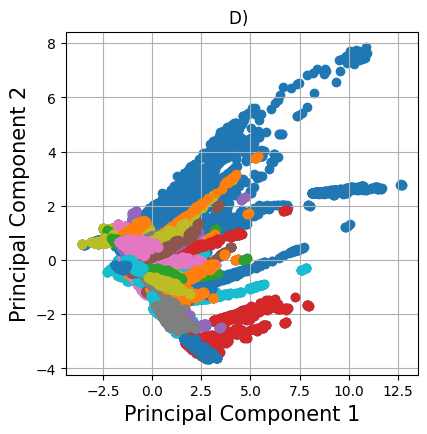

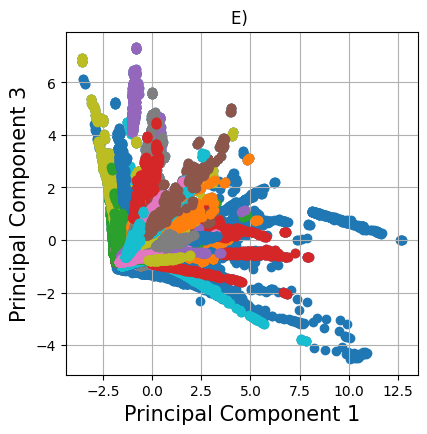

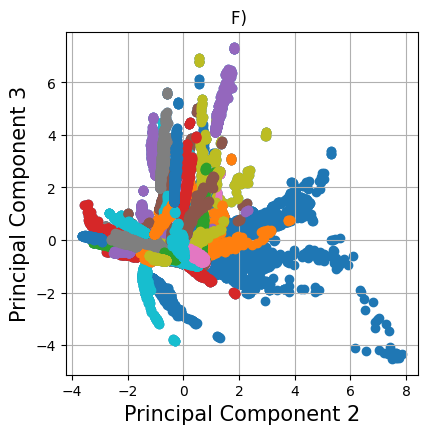

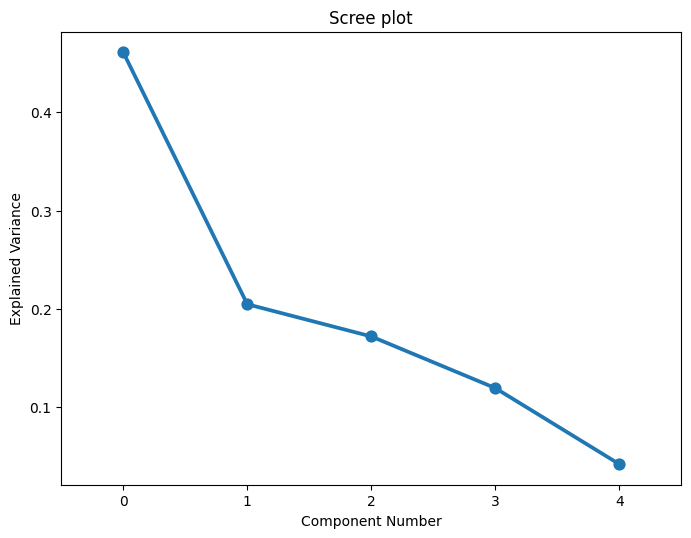

In [308]:
import matplotlib.ticker as mtick
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib.markers as markers

import matplotlib.markers as markers

# Get a list of all available markers
marker_list = list(markers.MarkerStyle.markers.keys())

outputvalsname =  ['cs','coa','cod','cca','ccd','co2','css2']# 'co','cc',#'cl',
takeOut =[]


selectedSets = (set( df['pSet'].unique())-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

# Separating out the features
x = dfa[outputvalsname]

# Separating out the target
y = df['pSet']
target = df['pSet']# pd.DataFrame(data = y , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target] , axis = 1)
#finalDf['outlier'] = [idd in np.array([1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]) 
#                      for idd in finalDf['pSet']]

numMarker=13
numCol = 8

marker_id =np.array( [[i]*numCol for i in range(numMarker)]).reshape(-1)[:99]
color_id  =np.array( [[i for i in range(numCol)]*numMarker]).reshape(-1)[:99]

pSet2mark = dict(zip(np.unique(df['pSet']), marker_id))
pSet2col = dict(zip(np.unique(df['pSet']), color_id))
markers_map = dict(zip(np.array([i for i in range(numMarker)]),marker_id))
markers_map2markers_list = dict(zip(markers_map,marker_list))


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))

finalDf['color'] = finalDf['pSet'].map(pSet2col).map(color_map)


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,1)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

#for pset in range(99):

#    subset = finalDf[finalDf['pSet']==pset]
#    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           #, c = subset['color'] 
           #, marker= markers_map2markers_list[pSet2mark[pset]]
           )

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               #, marker= markers_map2markers_list[pSet2mark[pset]]
               )
    #plt.legend()
        
ax.set_title(chr(ord('@')+4)+") ")
ax.grid()# the one near 30 is no 74

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,2)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

#for pset in range(99):
#    subset = finalDf[finalDf['pSet']==pset]
#    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 3']

           #, c = subset['color'] 
           #, marker= markers_map2markers_list[pSet2mark[pset]]
           )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 3'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               #, marker= markers_map2markers_list[pSet2mark[pset]]
               )
    #plt.legend()
        
ax.set_title(chr(ord('@')+5)+") ")
ax.grid()# the one near 30 is no 74

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,3)#projection='3d') 
        
ax.set_title(chr(ord('@')+6)+") ")
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

#subset = finalDf[finalDf['pSet']==pset]
#if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
ax.scatter(finalDf[ 'principal component 2']
           , finalDf['principal component 3']
           #, c = subset['color'] 
           #, marker= markers_map2markers_list[pSet2mark[pset]]
           )

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 2']
               , subset['principal component 3'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               #, marker= markers_map2markers_list[pSet2mark[pset]]
               )
    ##plt.legend()

ax.grid()# the one near 30 is no 74
plt.show()
n_components = 5
 
# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(x)


# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [52]:
finalDf[finalDf['principal component 2']>20]

Empty DataFrame
Columns: [principal component 1, principal component 2, principal component 3, pSet, color]
Index: []

In [70]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.46104997 0.20477145 0.17200251] 0.8378239305171358


NameError: name 'randrange' is not defined

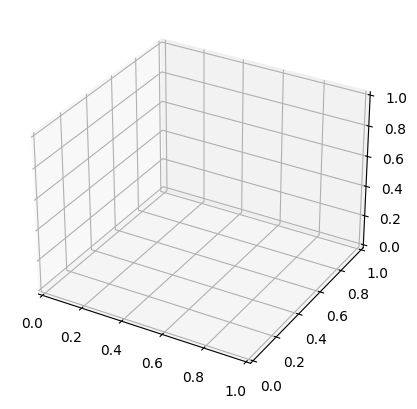

In [54]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

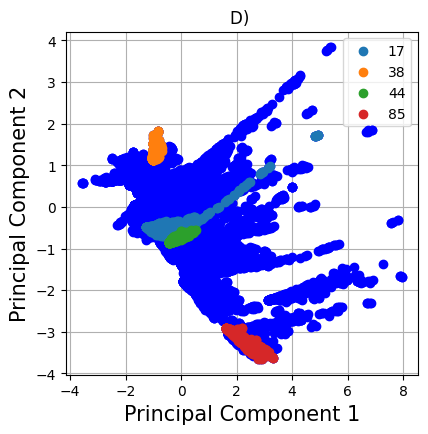

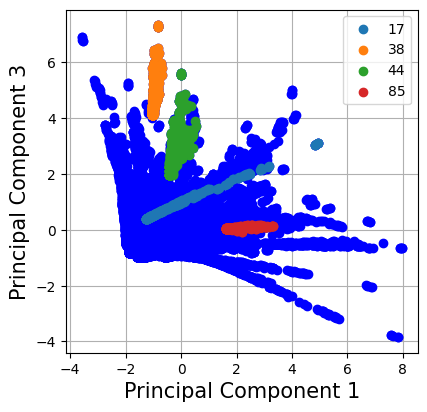

In [422]:

# Get a list of all available markers
#marker_list = list(markers.MarkerStyle.markers.keys())

outputvalsname =  ['cs','coa','cod','cca','ccd','co2', 'css2']# 'co','cc',#'cl',
takeOut =[]


selectedSets = (set( df['pSet'].unique())-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)


# Separating out the features
x = dfa[outputvalsname]

# Separating out the target
y = df['pSet']
target = df['pSet']# pd.DataFrame(data = y , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target] , axis = 1)
#finalDf['outlier'] = [idd in np.array([1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]) 
#                      for idd in finalDf['pSet']]

numMarker=13
numCol = 8

#marker_id =np.array( [[i]*numCol for i in range(numMarker)]).reshape(-1)[:99]
color_id  =np.array( [[i for i in range(numCol)]*numMarker]).reshape(-1)[:99]

pSet2mark = dict(zip(np.unique(df['pSet']), marker_id))
pSet2col = dict(zip(np.unique(df['pSet']), color_id))
#markers_map = dict(zip(np.array([i for i in range(numMarker)]),marker_id))
#markers_map2markers_list = dict(zip(markers_map,marker_list))


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))

finalDf['color'] = finalDf['pSet'].map(pSet2col).map(color_map)


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,1)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

#for pset in range(99):

#    subset = finalDf[finalDf['pSet']==pset]
#    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
if False:
    ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           , c = subset['color'] 
           , marker= markers_map2markers_list[pSet2mark[pset]]
           )

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                c ='b',# subset['color'] ,
               alpha=1, 
           zorder=100,#label=f'{pset}',
               )
for pset in  [17,38,44,85 ]:#[15,17,21,27,38,44,85]:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               )
    plt.legend()

ax.set_title(chr(ord('@')+4)+") ")
ax.grid()# the one near 30 is no 74

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,2)#projection='3d') 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 3'],
                c ='b',# subset['color'] ,
               alpha=1, 
           zorder=100,#label=f'{pset}',
               )
for pset in [17,38,44,85 ]:#[15,17,21,27,38,44,85]:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 3'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               )
    plt.legend()

if False:
    #for pset in range(99):
    #    subset = finalDf[finalDf['pSet']==pset]
    #    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
    if False:
        ax.scatter(finalDf[ 'principal component 1']
               , finalDf['principal component 3']

               , c = subset['color'] 
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )
            #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")

    for pset in selectedSets:
        subset = finalDf[finalDf['pSet']==pset]
        ax.scatter(subset[ 'principal component 1']
                   , subset['principal component 3'],
                    #c = subset['color'] ,
                   alpha=1, 
               zorder=100,label=f'{pset}'
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #plt.legend()

    ax.set_title(chr(ord('@')+5)+") ")
    ax.grid()# the one near 30 is no 74

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(2,2,3)#projection='3d') 

    ax.set_title(chr(ord('@')+6)+") ")
    ax.set_xlabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)

    #subset = finalDf[finalDf['pSet']==pset]
    #if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
    if False:
        ax.scatter(finalDf[ 'principal component 2']
               , finalDf['principal component 3']
               , c = subset['color'] 
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )

    for pset in selectedSets:
        subset = finalDf[finalDf['pSet']==pset]
        ax.scatter(subset[ 'principal component 2']
                   , subset['principal component 3'],
                    #c = subset['color'] ,
                   alpha=1, 
               zorder=100,label=f'{pset}'
                   #, marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        ##plt.legend()

ax.grid()# the one near 30 is no 74
plt.show()

In [423]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.46104997 0.20477145 0.17200251] 0.8378239305171362


In [57]:
import statistics
midpc1 = statistics.median(finalDf['principal component 1'])
print(midpc1)
midpc2 = statistics.median(finalDf['principal component 2'])
print(midpc2)

-0.34791496177510595
0.11207948167406462


In [58]:
dists = []
finalDf['dists']=np.nan
for psets in selectedSets:
    subset = finalDf[finalDf['pSet']==psets]
    dist = ((subset['principal component 1']-midpc1)**2 + 
           (subset['principal component 2']-midpc2)**2)**(1/2)
    finalDf.loc[finalDf['pSet']==psets, 'dists'] = np.mean(dist)

In [59]:
print(np.nanmax(finalDf['dists']),np.nanmin(finalDf['dists']))

5.187121344435788 0.4357315895246166


In [60]:
set(finalDf[
    (finalDf['dists'] == np.nanmin(finalDf['dists']) )]['pSet'])

{8}

In [312]:
set(finalDf[
    (finalDf[
        'principal component 2'] == min(finalDf['principal component 2'])
    )]['pSet'])

{85}

In [313]:
set(finalDf[
    (finalDf[
        'principal component 3'] == min(finalDf['principal component 3'])
    )]['pSet'])

{50}

In [62]:
(set(finalDf[
    (finalDf['principal component 2'] >2.9 )]['pSet'])-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

{12, 48}

In [63]:
(set(finalDf[
    (finalDf['principal component 1'] > 8 )]['pSet'])-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

set()

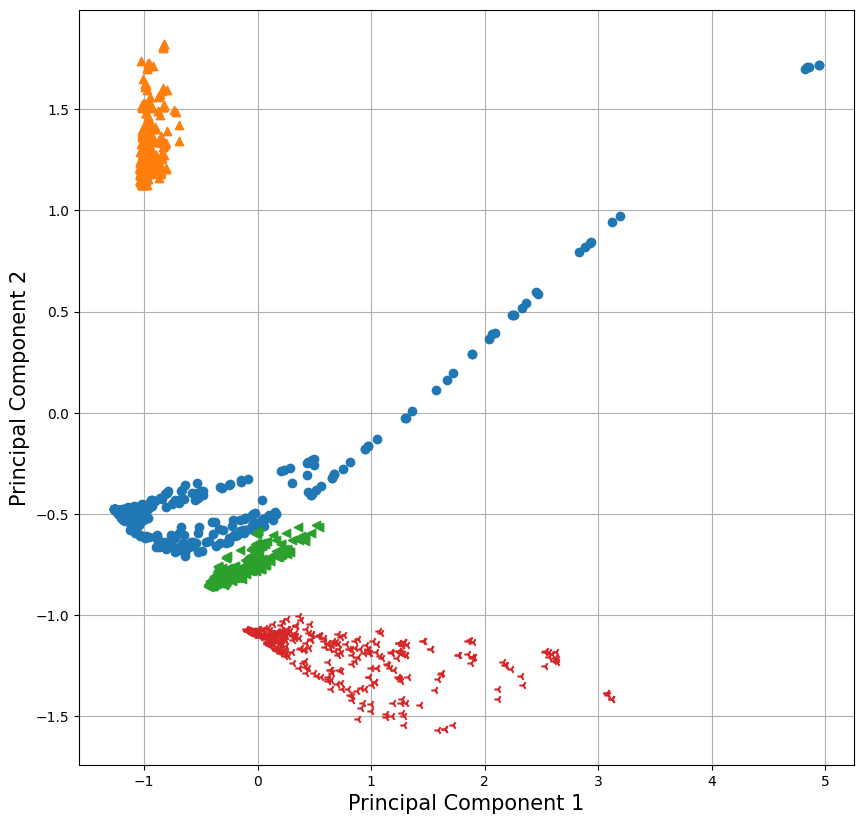

In [302]:

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
for pset in [17,38,44,73]:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )

ax.grid()# the one near 30 is no 74
plt.show()